# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import time

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# tensorflow & keras imports
import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.

# from keras import backend as K   # Abstraction layer for neural network backend engines. ## Don't use this because it's the standalone version of the backend
from tensorflow.keras import backend as K   # Abstraction layer for neural network backend engines. This one is integrated with Tensorflow

# Import models, layers, metrics, and optimizers from tensorflow.keras
from tensorflow.keras.models import Sequential #sequential api for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input #importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras.metrics import AUC, Precision, Recall  # Metrics for model evaluation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam,SGD #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  #regularization method to prevent the overfitting
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from tensorflow.keras.layers import BatchNormalization
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing import image



# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import OpenCV using the below code.  Also import image from tensorflow.keras
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing import image
print(f"OpenCV Version: {cv2.__version__}")

OpenCV Version: 4.11.0


## make sure you get consistent results by setting random seed

In [3]:
# Set the seed using tensorflow.keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed

np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

from tensorflow.keras.utils import set_random_seed
set_random_seed(42)  # Use tensorflow.keras.utils to set the seed for consistency


# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it might affect the overall performance
### Commented out line below because CNN training was failing with this
### Error: GPU MaxPool gradient ops do not yet have a deterministic XLA implementation.
#tf.config.experimental.enable_op_determinism()  # Ensure reproducibility on GPU

## Query CPU type

In [4]:
# Query CPU information
print("CPU Information is shown below:")
!cat /proc/cpuinfo | grep 'model name' | uniq

CPU Information is shown below:
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz


## Query GPU type if available

In [5]:
# Check if GPU is available and print the GPU details


# Use the nvidia-smi command to get detailed GPU information
!nvidia-smi

# Check if TensorFlow is using a GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Thu Apr  3 13:56:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Loading the  image dataset

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import os
os.chdir('/content/drive/MyDrive/AI-Bootcamp-demo')
os.listdir()

['t-sne.ipynb',
 'transformer.png',
 'SM_attention_demo.ipynb',
 'temp',
 'config2_emb_tested.json',
 'ecomm.db',
 'policy_docs',
 'config_GANLP.json',
 'config_secrets.json',
 'LLAMA-Nemo_GuardRails.ipynb',
 'Loan_Modelling.csv',
 'Demo1-Tools-SM-AIML_ML_Project_full_code_notebook.ipynb',
 'Demo2-cuda_speedtest.ipynb',
 'Demo3-tensorflow_pytorch.ipynb',
 'images.npy',
 'Demo4-ComputerVision_CNN_Notebook.ipynb',
 'Labels.csv']

In [12]:
images_array = np.load('images.npy')

### Loading the labels dataset

In [13]:
# read in the labels.csv file in pandas
labels = pd.read_csv('Labels.csv')

## Data Overview

### Understand the shape of the dataset

### Looking at the labels dataset

In [14]:
print("labels.head()")
display(labels.head())

print("\nlabels['Label'].value_counts(dropna=False)")
display(labels['Label'].value_counts(dropna=False))

print("\nlabels['Label'].value_counts(normalize=True)")
display(labels['Label'].value_counts(normalize=True))

print("\nlabels['Label'].describe()")
display(labels['Label'].describe())

print("\nlabels.info()")
display(labels.info())

print("\nlen(labels['Label'].unique())")
display(len(labels['Label'].unique()))

print("\nlabels.shape")
display(labels.shape)
print()
print(f"Number of labels in labels dataframe is number of images in image array ? : {labels['Label'].shape[0] == images_array.shape[0]}" )

labels.head()


Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill


labels['Label'].value_counts(dropna=False)


Label
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: count, dtype: int64


labels['Label'].value_counts(normalize=True)


Label
Loose Silky-bent             0.137684
Common Chickweed             0.128632
Scentless Mayweed            0.108632
Small-flowered Cranesbill    0.104421
Fat Hen                      0.100000
Charlock                     0.082105
Sugar beet                   0.081053
Cleavers                     0.060421
Black-grass                  0.055368
Shepherds Purse              0.048632
Common wheat                 0.046526
Maize                        0.046526
Name: proportion, dtype: float64


labels['Label'].describe()


count                 4750
unique                  12
top       Loose Silky-bent
freq                   654
Name: Label, dtype: object


labels.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


None


len(labels['Label'].unique())


12


labels.shape


(4750, 1)


Number of labels in labels dataframe is number of images in image array ? : True


**Observations:**

- There are 4,750 labels corresponding to the 4,750 BGR images. (Number of labels in labels dataframe is number of images in image array ? : True)
- None of the labels are missing
- There are 12 labels
- `Loose Silky-bent` shows up more than others (654 times)


#### Looking at image dataset

In [15]:
print(f"Number of images: {images_array.shape[0]}")
print(f"Aspect Ratio: {images_array.shape[1:3]}")
print(f"Color Channels: {images_array.shape[3]}")


Number of images: 4750
Aspect Ratio: (128, 128)
Color Channels: 3


In [16]:
images_array.ndim

4

In [17]:
images_array.dtype

dtype('uint8')

### Lets look at the 1st image array

array([[[ 35,  52,  78],
        [ 36,  49,  76],
        [ 31,  45,  69],
        ...,
        [ 78,  95, 114],
        [ 76,  93, 110],
        [ 80,  95, 109]],

       [[ 33,  46,  68],
        [ 37,  50,  73],
        [ 48,  65,  83],
        ...,
        [ 81,  96, 113],
        [ 74,  89, 105],
        [ 83,  95, 109]],

       [[ 34,  50,  68],
        [ 35,  52,  72],
        [ 70,  85, 101],
        ...,
        [ 83,  97, 112],
        [ 79,  94, 108],
        [ 79,  94, 107]],

       ...,

       [[ 35,  50,  69],
        [ 42,  57,  73],
        [ 42,  57,  72],
        ...,
        [ 60,  76,  92],
        [ 67,  81,  97],
        [ 64,  77,  95]],

       [[ 36,  52,  67],
        [ 48,  63,  78],
        [ 41,  57,  73],
        ...,
        [ 44,  66,  83],
        [ 58,  76,  91],
        [ 57,  74,  90]],

       [[ 44,  58,  70],
        [ 43,  57,  73],
        [ 40,  55,  72],
        ...,
        [ 41,  70,  92],
        [ 55,  78,  97],
        [ 61,  79,  96]]], dtype=uint8)
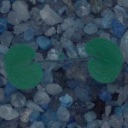

Small-flowered Cranesbill


In [ ]:
# Set NumPy to print the full array without truncation
# np.set_printoptions(threshold=np.inf)

# Resets to default settings
np.set_printoptions()


# Print the first image array
display(images_array[0])
print(labels.Label[0])


**Obesrvations:**

- The array represents images
- There are 4750 images
- each image is 128 by 128 pixels (rows(height) * columns(width)
- Each image is a color image with 3 channels

In [ ]:
# Access the first image and the first pixel of that image
first_image = images_array[0]
first_pixel = first_image[0, 0]  # Accessing the top-left pixel (row 1, column1)
print("Pixel value at (0, 0):", first_pixel)

Pixel value at (0, 0): [35 52 78]


### Let's determine the possible format of the image

**In natural images, Red is more intense than Blue**
- if the images show the first pixel to be higher then it is likely RGB format.  
- However, if the 3rd pixel has a higher value than the first pixel, then it is in BGR format

In [ ]:
# Analyze the first pixel
if first_pixel[0] > first_pixel[2]:
    print("The image is likely in RGB format.")
else:
    print("The image is likely in BGR format.")

The image is likely in BGR format.


### Lets see the first image without converting to RGB
- matplotlib will assume it is RGB, however, we've determined our image format is actually BGR

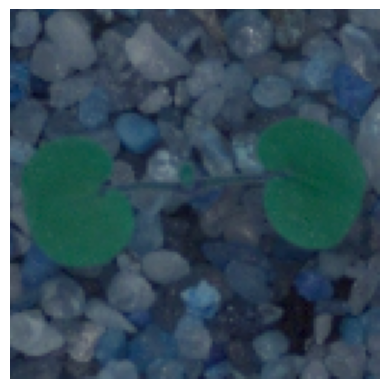

In [ ]:
import matplotlib.pyplot as plt

# Display the image
plt.imshow(first_image)
plt.axis('off')  # Turn off axis labels
plt.show()


### Since we've determined that the images are in BGR format, let's look at the image with openCV whose default format is BGR

- **Interpolation Method used in OpenCV:**

 **cv2.INTER_LINEAR** is a good balance between quality and performance, making it suitable for most standard resizing operations, especially when the size change is not too drastic.

 Other methods available are:
 - cv2.INTER_NEAREST
 - cv2.INTER_CUBIC
 - cv2.INTER_LANCZOS4
 - cv2.INTER_AREA

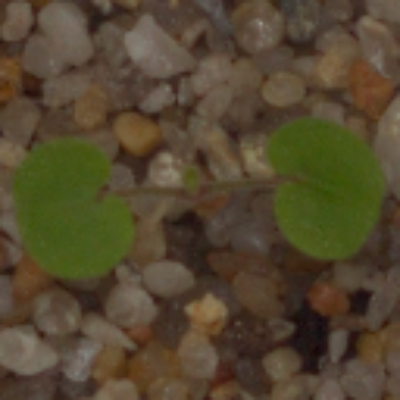

Small-flowered Cranesbill


In [ ]:
# Display the image using openCV whose default format is BGR

## do a bit of resizing ( experimented to match the above image size, so we can compare visually)
height = 400
width = 400
dimensions = (width, height)
new_image = cv2.resize(first_image, dimensions, interpolation=cv2.INTER_LINEAR)



cv2_imshow(new_image)
print(labels['Label'][0])

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

### 1. How are these different category plant images different from each other?

**Let's look at an image of each category**

let's identify the indexes of the first occurance of each label from the labels DF

drop_duplicates(subset='Label', keep='first'):
  - **subset='Label'**: Specifies that duplicates should be identified based on the Label column.
  - **keep='first'**: Ensures that only the first occurrence of each unique label is kept, while subsequent duplicates are dropped.
  - **index:**
Retrieves the indexes of the rows that remain after dropping duplicates, which correspond to the first occurrence of each label.

In [ ]:
# Get the indexes of the first occurrence of each unique label
first_occurrences = labels.drop_duplicates(subset='Label', keep='first').index

# Convert the Int64Index to a list
first_occurrences_list = first_occurrences.tolist()

# Display the list
print(f"first_occurrences_list: shows index values of first occurance: {first_occurrences_list}")

first_occurrences_list: shows index values of first occurance: [0, 496, 971, 1202, 1423, 2034, 2424, 2711, 3227, 3612, 3833, 4096]


### Now view those images using matplotlib.  Need to convert to RGB from BGR using **cv2.cvtColor()**

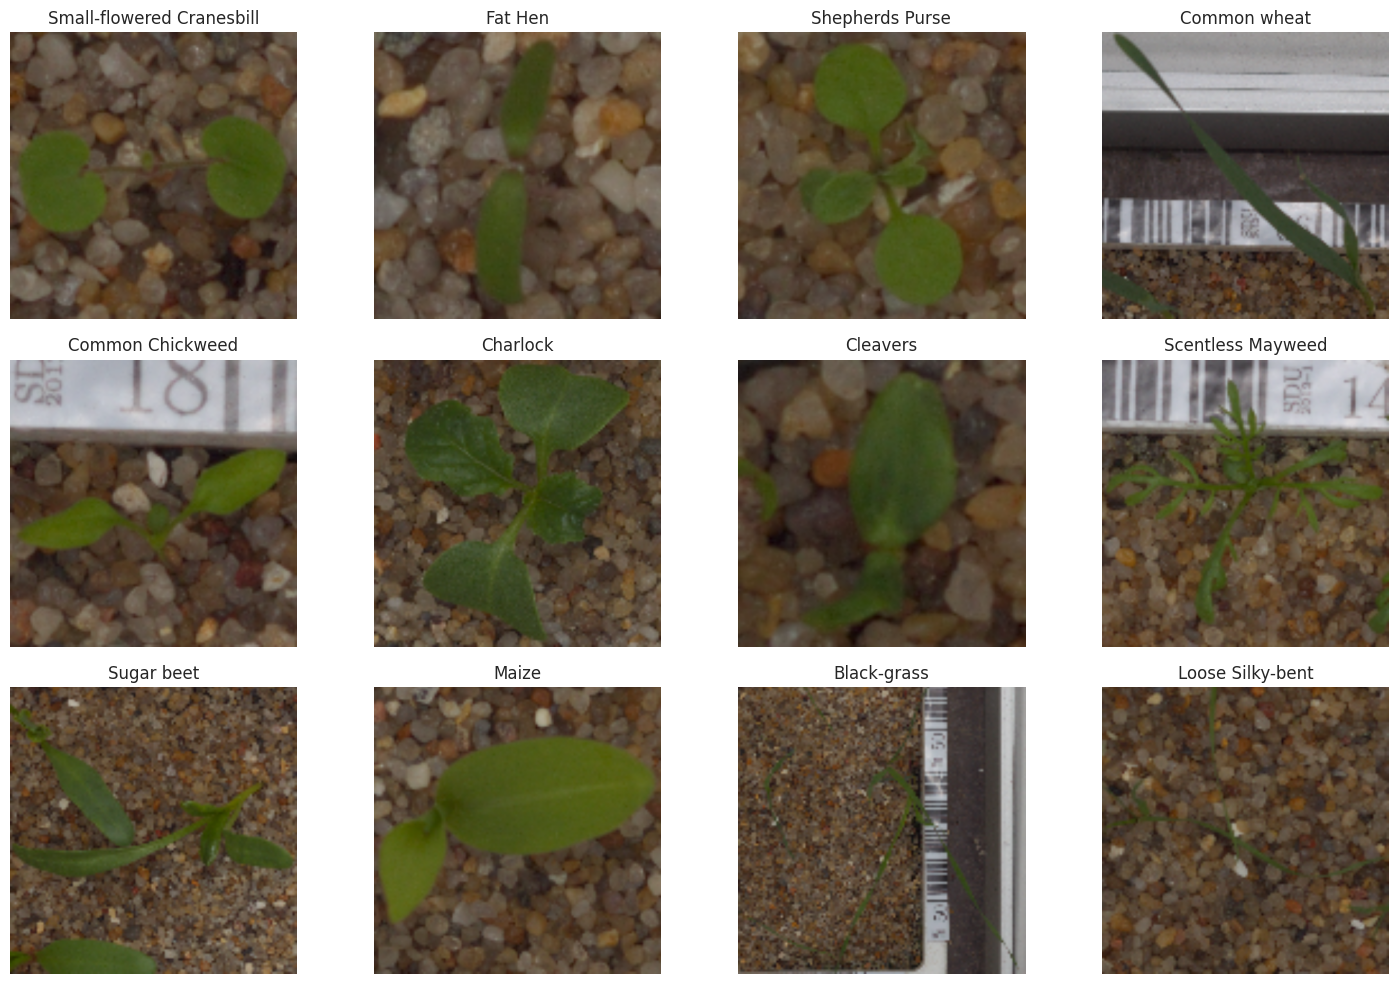

In [ ]:
import cv2
import matplotlib.pyplot as plt


# Create a 3x4 grid
rows, cols = 3, 4

# Create a matplotlib figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Loop over the first_occurrences_list and plot each image
for i, label in enumerate(first_occurrences_list):
    # Calculate the row and column index for the current image
    row = i // cols # integer division, to determine row
    col = i % cols # modulo operator (for remainder), to determine column

    # Resize the image
    height, width = 400, 400
    dimensions = (width, height)
    new_image = cv2.resize(images_array[label], dimensions, interpolation=cv2.INTER_LINEAR)

    # Display the image and label in the subplot
    axes[row, col].imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    axes[row, col].set_title(labels['Label'][label])
    axes[row, col].axis('off')  # Turn off the axis for a cleaner look

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### Is the dataset provided an imbalance? (Check with using bar plots)

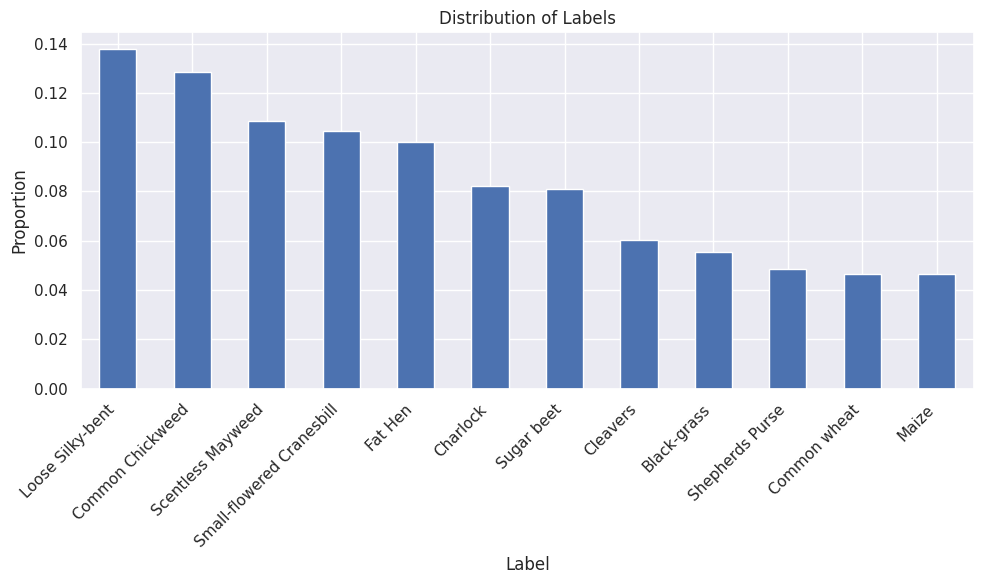

In [ ]:
import matplotlib.pyplot as plt

# Calculate the label distribution
label_distribution = labels['Label'].value_counts(normalize=True)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
label_distribution.plot(kind='bar')


# Adding title and labels
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Proportion')

# Display the bar graph
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability (ha: horizontal alignment, anchors are the x-ticks)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()




### Let's examine the Image Size of images (aspect Ratio Distribution)
- Objective: Understand if there is variation in the image sizes or aspect ratios that could impact model training.
- How: Plot histograms or box plots of image dimensions (width and height) and aspect ratios.

**Explanation:**

- **image_shapes = [img.shape[:2] for img in images_array]**:  
  - using list comprehension, create a list  of tuples. Each tuple contains the 1st 2 elements of the arrays, --> height and width.

- **zip(*image_shapes):**
  - zip(*image_shapes) takes the list of tuples image_shapes and "unzips" it into two separate lists: one containing all the heights and the other containing all the widths.
  - The * operator is used to unpack the list of tuples into separate arguments for the zip function.
  - heights, widths = zip(*image_shapes) stores these two lists in the variables heights and widths.

- **plt.hist(heights, bins=20, color='blue', alpha=0.7):**
  - Plots a histogram of the heights list.
  - bins=20 specifies that the histogram should have 20 bins (intervals).
  - alpha=0.7 sets the transparency of the bars, where 1 is fully opaque and 0 is fully transparent.

- **plt.hist(widths, bins=20, color='green', alpha=0.7):**
  - Plots a histogram of the widths list.
  - bins=20 specifies that the histogram should have 20 bins (intervals).
  - alpha=0.7 sets the transparency of the bars, where 1 is fully opaque and 0 is fully transparent.

- **plt.subplot(1, 2, 1)** creates a subplot grid with 1 row and 2 columns, and selects the first subplot (left side) as the active plot.  

- **plt.subplot(1, 2, 2)** selects the second subplot (right side) as the active plot.

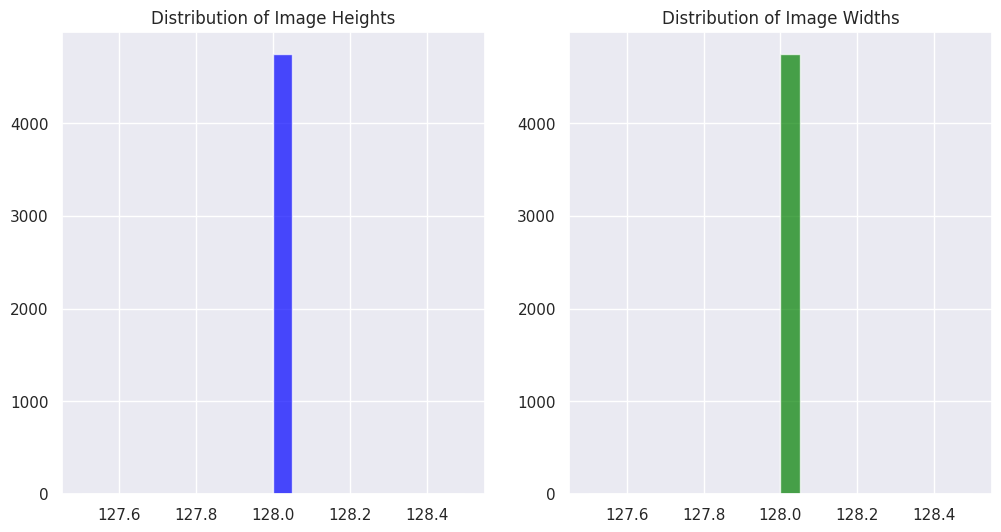

In [ ]:
# Extract width and height of each image
image_shapes = [img.shape[:2] for img in images_array]
heights, widths = zip(*image_shapes)

# Plot histograms of heights and widths
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(heights, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Image Heights')

plt.subplot(1, 2, 2)
plt.hist(widths, bins=20, color='green', alpha=0.7)
plt.title('Distribution of Image Widths')
plt.show()


### Class Overlap: How hard would it be to distinguish between the images:

**Using t-SNE plot to visual summary of how image data is organized according to the features.**

**Explanation:**

- **img.flatten()** takes the 128\*128*3 image and flattens to 49152
- **[img.flatten() for img in images_array]** List compreneshion: iterates over all images in images_array and flattens each one
- **np.array()** converts the list into an numpy array (required for t-sne)

- **TSNE(n_components=2, random_state=42):**
  - **n_components=2:** Specifies that the output should be 2-dimensional, which is suitable for 2D visualization.
  - **random_state=42:** Sets the random seed for reproducibility. This ensures that the results are the same each time the code is run.
  - **tsne_result:** is a 2D array where each row corresponds to an image, and the columns are the new 2D coordinates.
  - **x=tsne_result[:, 0]:** Uses the first column of tsne_result (the first t-SNE component) as the x-axis values.
  - **y=tsne_result[:, 1]:** Uses the second column of tsne_result (the second t-SNE component) as the y-axis values.

- **bbox_to_anchor=(1.05, 1):** Positions the legend outside the main plot area, to the right.

- **'tab10'** is a predefined color palette that comes from the Matplotlib library. It contains 10 distinct colors and is often used for categorical data because it offers a good contrast between colors, making it easier to distinguish between different categories.
- **legend='full':** This is useful when you want to display a comprehensive legend that represents all possible categories, regardless of whether they are present in the specific data subset being plotted

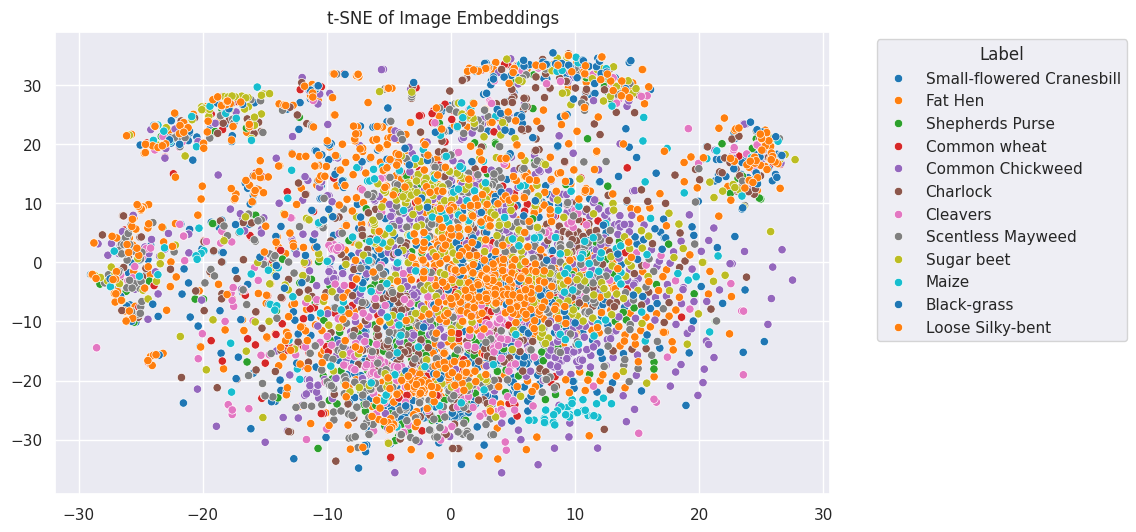

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten the images and convert to a NumPy array
flattened_images = np.array([img.flatten() for img in images_array])

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(flattened_images)

# Visualize the t-SNE result
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=labels['Label'], palette='tab10', legend='full')
plt.title('t-SNE of Image Embeddings')
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



**Interpretation of t-SNE Plot**
- **Clusters:** The plot shows how images are grouped together based on their features. Points that are closer to each other are considered more similar by t-SNE.
- **Overlapping Areas:** Some categories have points that overlap significantly with others. For example, the orange points (representing **"Loose Silky-bent"**) are spread out across a large part of the plot, often overlapping with other categories. This overlap suggests that the features used to distinguish these categories might not be sufficiently discriminative, leading to similar embeddings for different categories.

- **Isolated Clusters:** Some points form distinct clusters (e.g., some of the blue points representing "**Small-flowered Cranesbill**" and **"Common Chickweed"**), indicating that t-SNE has identified distinct groupings in the data that correspond well with specific categories.

### Let's try to find the color distribution of sample images

- **categories = labels['Label'].unique().tolist():**   gets a list of labels
- **cv2.calcHist in OpenCV** is used to calculate the histogram of an image. A histogram represents the frequency of pixel intensity values in an image, providing insights into the distribution of color intensities.

- **cv2.calcHist(images, channels, mask, histSize, ranges)**
  - **channels**, corresponding to `i` 0, 1, 2 for blue, green,  red
  - **mask:** None. Specifies a mask to be applied on the image if you only want to calculate the histogram for a specific region. Since this is None, the histogram is calculated for the entire image.
  - **histSize:** 256.  Defines the number of bins in the histogram. Here, 256 bins are used, meaning each bin corresponds to one of the possible pixel intensity values (from 0 to 255).
  - **ranges:** [0, 256]: Specifies the range of pixel intensity values to be considered. The histogram will count pixels with intensity values in this range.

- **images_array[labels[labels['Label'] == category].index[0]]** Finds the index of the first image in images_array that matches the category category.
  - [labels['Label']: shows all Label
  - example: labels[labels['Label'] == 'Small-flowered Cranesbill'] will show all entries where Label is 'Small-flowered Cranesbill'. Lets pull out the 1st entry by index[0]
  - images_array[<index>]:  pulls out the corresponding image matching that index


- **plot_color_histogram(sample_image, ...):**
This is a function call that plots the color histogram of sample_image on the given axes.

- **axes[i // 4, i % 4]:**
This provides the correct subplot (in the grid) where the histogram should be plotted.
For example, if i = 5, the histogram is plotted in the subplot at row 1, column 1 of the grid.

- **.set_title(category)** his method sets the title of the selected subplot.


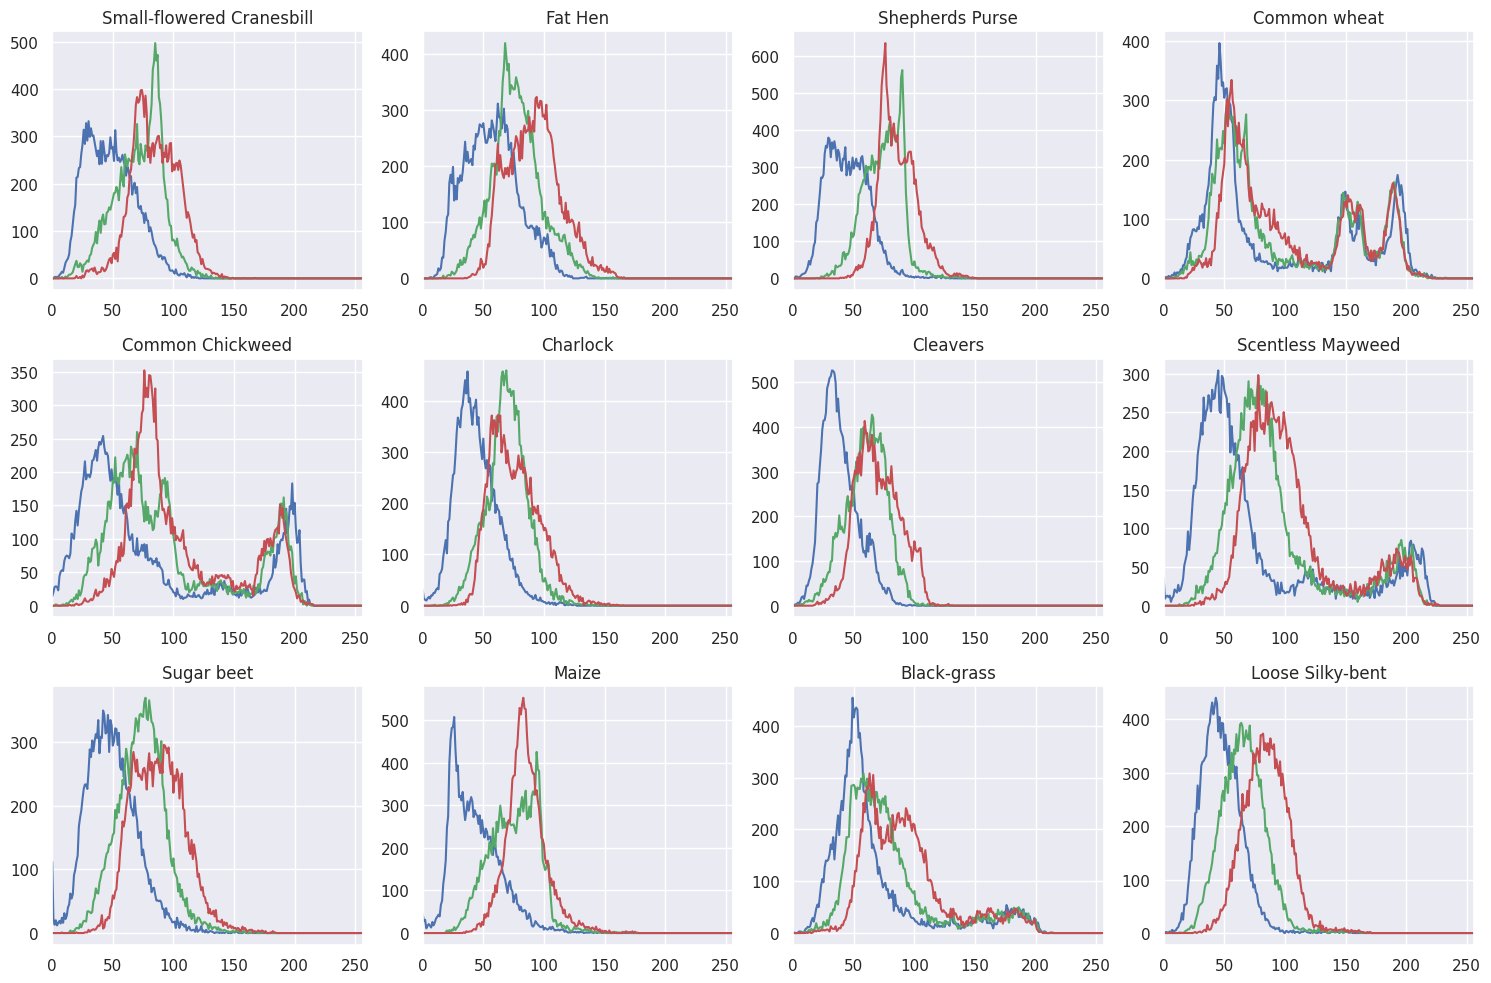

In [ ]:
import cv2

categories = labels['Label'].unique().tolist()

# Function to plot color histogram
def plot_color_histogram(image, ax):
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        ax.plot(hist, color=col)
    ax.set_xlim([0, 256])

# Plot color histograms for sample images from each category
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
for i, category in enumerate(categories):
    sample_image = images_array[labels[labels['Label'] == category].index[0]]
    plot_color_histogram(sample_image, axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(category)
plt.tight_layout()
plt.show()


**Interpreting the Graph:**

- X-Axis (0 to 256): Represents the intensity values for each color channel (Blue, Green, Red).
- Y-Axis: Represents the number of pixels in the image that have each intensity value.
- Color Channels (Blue, Green, Red): Each plot shows three curves, one for each color channel. The curves represent the distribution of pixel intensities in that color channel for the sample image.
Insights from the Graph:

- Different Color Profiles: Each plant species has a unique color profile. Some species might have a higher concentration of certain colors, which is evident from the peaks in the histograms.

- Comparison Between Categories: By comparing the histograms, we observe how the color distribution differs between categories. For instance, some plants might have a stronger presence of green (indicating lush foliage), while others might show more red or blue.

- Peaks and Troughs: The peaks in each curve indicate the most common intensity values for that color in the image. For example, if the green curve has a peak at a high intensity value, it suggests that the image has many bright green pixels.

**Observations:**
- **Distribution:** we can clearly see from the barplot that the distribution of labels is not balanced
- **height/width (aspect)**: all images have height and width of 128
- **Overlaps:** Loose Silky-bent may overlap with others
- **Distinguished Features** Small-flowered Cranesbill and "Common Chickweed" can be distinguished easier
- **Different Color Profiles:** Each plant species has a unique color profile. Some species might have a higher concentration of certain colors, which is evident from the peaks in the histograms.

## Data Pre-Processing

### Convert the BGR images to RGB images.
- using list comprehension

In [ ]:
import cv2
import numpy as np

# Convert BGR to RGB
rgb_images_array = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images_array]


### Let's plot the unique images to make sure we got the images converted properly

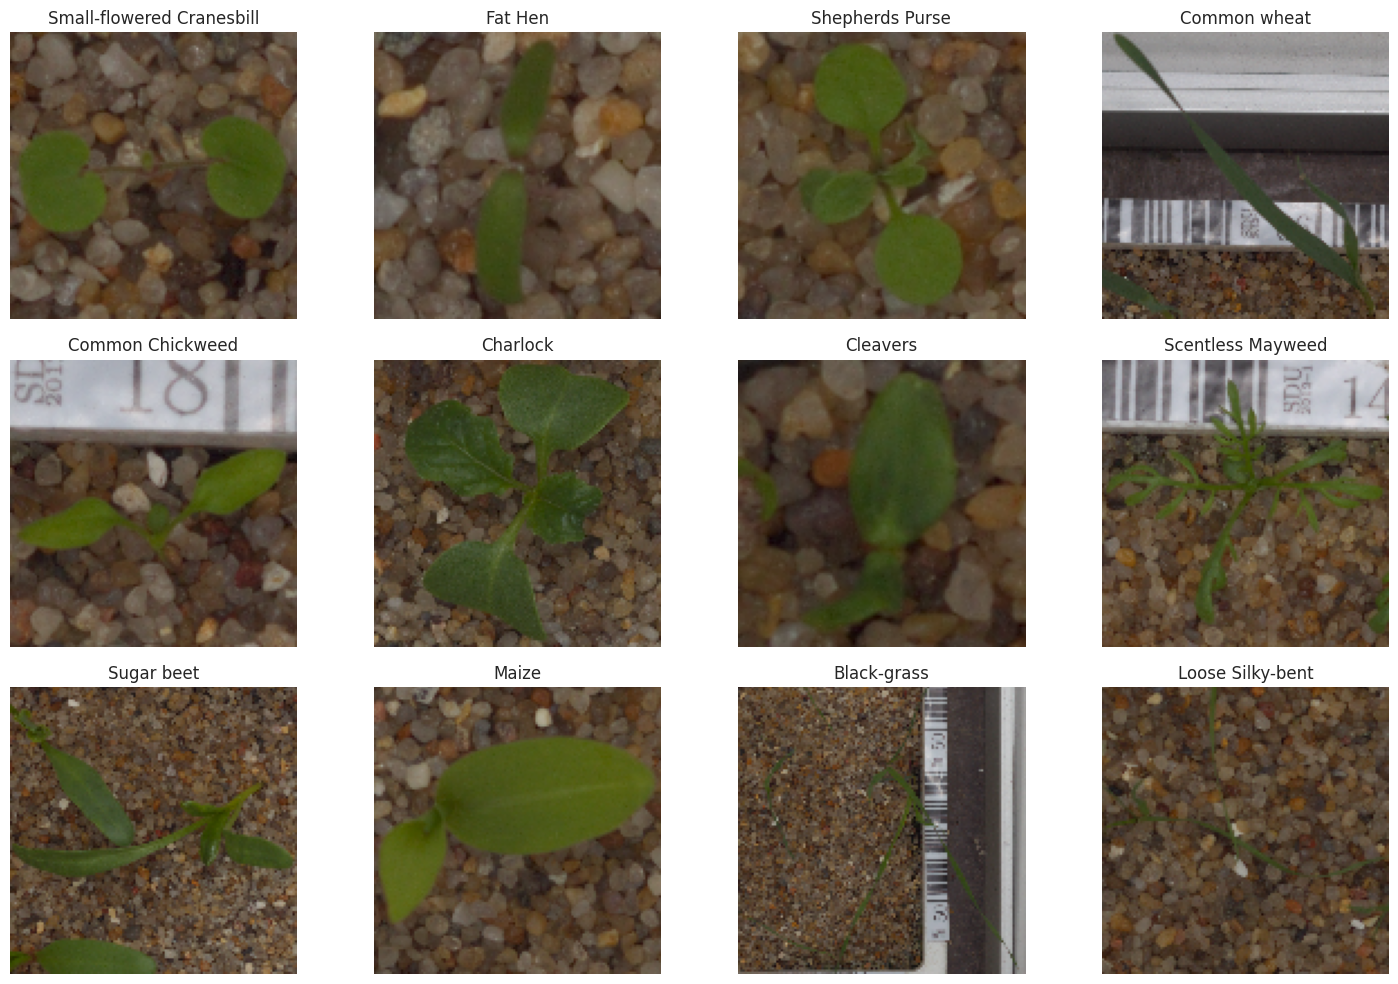

In [ ]:
# Get the indexes of the first occurrence of each unique label
first_occurrences = labels.drop_duplicates(subset='Label', keep='first').index

# Convert the Int64Index to a list
first_occurrences_list = first_occurrences.tolist()

# Defoine rows and columns
cols = 4
rows = len(first_occurrences_list) // cols + (len(first_occurrences_list) % cols > 0)

# Create a figure and axis grid
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Loop over the first_occurrences_list and plot each image
for i, label in enumerate(first_occurrences_list):
    # Calculate the row and column index for the current image
    row = i // cols # integer division, to determine row
    col = i % cols # modulo operator (for remainder), to determine column

    # Resize the image
    height, width = 400, 400
    dimensions = (width, height)


    # Display the image and label in the subplot
    axes[row, col].imshow(rgb_images_array[label]) # note: label is the index value of the image
    axes[row, col].set_title(labels['Label'][label])
    axes[row, col].axis('off')  # Turn off the axis for a cleaner look

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Resize the images
- using cv2.resize()

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
# Convert the list of arrays to a single NumPy array
rgb_images_array_np = np.array(rgb_images_array)

print(f"original rgb_images_array_np.shape: {rgb_images_array_np.shape}")

# Initialize an empty array to store the resized images
new_size = (64, 64)  # The new dimensions

# Initialize an empty list to store the resized images
resized_images_list = []

# Loop through each image in the original array
for img in rgb_images_array_np:
    # Resize the image to 64x64
    resized_img = cv2.resize(img, new_size)
    # Append the resized image to the list
    resized_images_list.append(resized_img)

# Convert the list of resized images back to a NumPy array
resized_images_array_np = np.array(resized_images_list)

# Check the shape of the new array
print(f"resized_images_array_np.shape: {resized_images_array_np.shape}")

original rgb_images_array_np.shape: (4750, 128, 128, 3)
resized_images_array_np.shape: (4750, 64, 64, 3)


### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance


**Split the dataset**

**shuffle=True (default behavior):**

- When shuffle=True, the data is shuffled before being split into training and test/validation sets. This means that the samples are randomly mixed, ensuring that the distribution of the data is more uniform across the splits.

**shuffle=False:**
- If shuffle=False, the data will be split in the order it appears in the dataset. This could lead to biased splits if the data is ordered or grouped in some way (e.g., all examples of one class appear consecutively).

**Why Use Shuffling?**
- Ensuring Random Distribution:
  - Shuffling ensures that the training, validation, and test sets have a representative distribution of the data. This is particularly important if your data is ordered or has some structure that could bias the model if not shuffled.
  - Avoiding Bias:
If your dataset is ordered in a way that groups similar samples together, splitting without shuffling could result in biased training and test sets, leading to poor generalization. For example, if all images of one class are grouped together, the test set might not include that class at all.

**Stratification and Shuffling:**
- **When using stratification (e.g., stratify=y)**, shuffling is particularly effective because it works together with stratification to ensure that each split has a proportional representation of each class. Even though stratification ensures proportional splits, shuffling further guarantees that the samples are randomly distributed within those proportions.

In [ ]:
X = resized_images_array_np  # Shape: (4750, 64, 64, 3)
y = labels  # Shape: (4750, 1)

# First, split into training + validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)

# Now split the training + validation set into separate training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42)

# Check the shapes of the resulting splits
print("X_train.shape, y_train.shape:", X_train.shape, y_train.shape)
print("X_val.shape, y_val.shape:", X_val.shape, y_val.shape)
print("X_test.shape, y_test.shape:", X_test.shape, y_test.shape)

X_train.shape, y_train.shape: (2850, 64, 64, 3) (2850, 1)
X_val.shape, y_val.shape: (950, 64, 64, 3) (950, 1)
X_test.shape, y_test.shape: (950, 64, 64, 3) (950, 1)


### Checking class balance for whole data, train set, validation set, and test set (use of stratify parameter)

In [ ]:
# Checking class balance for whole data, train set, validation set, and test set

y_data_list = ['y', 'y_train', 'y_val', 'y_test']

# Loop to check class balance
for data_name in y_data_list:
    data_set = eval(data_name)
    print(f"Target value ratio in {data_name}:")
    print(f"Data Set Name: {data_set.value_counts(normalize=True)} \n{'-'*80}")

Target value ratio in y:
Data Set Name: Label                    
Loose Silky-bent             0.137684
Common Chickweed             0.128632
Scentless Mayweed            0.108632
Small-flowered Cranesbill    0.104421
Fat Hen                      0.100000
Charlock                     0.082105
Sugar beet                   0.081053
Cleavers                     0.060421
Black-grass                  0.055368
Shepherds Purse              0.048632
Common wheat                 0.046526
Maize                        0.046526
Name: proportion, dtype: float64 
--------------------------------------------------------------------------------
Target value ratio in y_train:
Data Set Name: Label                    
Loose Silky-bent             0.137544
Common Chickweed             0.128772
Scentless Mayweed            0.108772
Small-flowered Cranesbill    0.104211
Fat Hen                      0.100000
Charlock                     0.082105
Sugar beet                   0.081053
Cleavers                 

**Observation:**
- stratify parameter worked as expected (class distributions are similar)

### Encode the target labels
* Note Encoding is generally done after splitting to prevent data leakage


### comparision of possible encoding methods for this

| Feature/Aspect                      | `LabelBinarizer`                                    | `tf.keras.utils.to_categorical`                      |
|-------------------------------------|-----------------------------------------------------|------------------------------------------------------|
| **Library**                         | `scikit-learn`                                      | `TensorFlow/Keras`                                   |
| **Purpose**                         | Converts labels to a one-hot encoded format or a binary matrix. | Converts labels to a one-hot encoded format.          |
| **Input Type**                      | Supports various types of input (integers, strings, etc.). | Primarily designed for integer labels.               |
| **Output Type**                     | Returns a binary matrix (e.g., for multi-label classification) or a one-hot encoded array. | Returns a one-hot encoded array.                     |
| **Automatic Handling of Classes**   | Needs to be fitted on the data using `fit` or `fit_transform` to determine the number of classes. | Automatically determines the number of classes based on the maximum label value. |
| **Multi-Label Classification**      | Can handle multi-label classification (multiple classes per instance). | Typically used for single-label multi-class classification. |
| **Inverse Transformation**          | Supports inverse transformation (can convert one-hot encoded arrays back to labels). | Does not support inverse transformation natively.    |
| **Shape of Output**                 | The output shape is `(n_samples, n_classes)` for one-hot encoding. | The output shape is `(n_samples, n_classes)`.        |
| **API Simplicity**                  | Requires fitting before transformation; more steps involved. | Simple, one-step process: directly transforms labels to one-hot encoding. |
| **Common Use Cases**                | Suitable for general machine learning tasks, especially those involving `scikit-learn` pipelines. | Often used in deep learning tasks within TensorFlow/Keras workflows. |
| **Dependency**                      | Depends on `scikit-learn`.                           | Depends on `TensorFlow/Keras`.                        |

**For this case we choose to use LabelBinarizer from sklearn**

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Initialize the LabelBinarizer
lb = LabelBinarizer()

# Fit the LabelBinarizer on the training labels and transform them
y_train_encoded = lb.fit_transform(y_train)

# Transform the validation and test labels using the same LabelBinarizer
y_val_encoded = lb.transform(y_val)
y_test_encoded = lb.transform(y_test)

# Check the shapes of the encoded labels
print("Encoded training labels shape:", y_train_encoded.shape)
print("Encoded validation labels shape:", y_val_encoded.shape)
print("Encoded test labels shape:", y_test_encoded.shape)


Encoded training labels shape: (2850, 12)
Encoded validation labels shape: (950, 12)
Encoded test labels shape: (950, 12)


### Data Normalization

In neural networks, it is always suggested to **normalize the feature inputs**. Normalization has the below benefits while training the model of a neural network:

1. **Normalization makes the training faster and reduces the chances of getting stuck at local optima.**
2. **weight decay and estimation can be done more conveniently** with normalized inputs.
3. In deep neural networks, **normalization helps to avoid exploding gradient problems.** Exploding Gradients problem occurs when large error gradients accumulate and result in very large updates to neural network model weights during training. This makes a model unstable and unable to learn from the training data.

**Why Normalize All Datasets?**
- **Consistency:**
    -  Your model expects input data to be within a specific range (e.g., [0, 1] after normalization). If only one dataset is normalized and the others are not, the model will perform inconsistently when exposed to data in different ranges.
  - Normalizing all datasets ensures that the data distribution is consistent across training, validation, and testing.
  - **Generalization:**
    - The model is trained on normalized data (e.g., X_train_normalized), so it should also be validated (X_val_normalized) and tested (X_test_normalized) on data that is in the same normalized range. This helps the model generalize well and perform predictably on unseen data.
- **Avoiding Data Leakage:**
    - Although normalization uses a simple scalar (255), it’s important to maintain the same preprocessing for all datasets to avoid inadvertently introducing inconsistencies.  **Since this is a simple scalar normalization, we could have done the normalization even before the split of train, val and test data**

As we know image pixel **values range from 0-255**, here we are simply **dividing all the pixel values by 255 to standardize all the images to have their pixel values between 0-1.**

In [ ]:
# Normalize the training, validation, and test datasets to the range [0, 1]
X_train_normalized = X_train / 255.0
X_val_normalized = X_val / 255.0
X_test_normalized = X_test / 255.0

# Check the minimum and maximum values to verify normalization
print("X_train_normalized Min value:", X_train_normalized.min(), "Max value:", X_train_normalized.max())
print("X_val_normalized Min value:", X_val_normalized.min(), "Max value:", X_val_normalized.max())
print("X_test_normalized Min value:", X_test_normalized.min(), "Max value:", X_test_normalized.max())


X_train_normalized Min value: 0.0 Max value: 1.0
X_val_normalized Min value: 0.0 Max value: 1.0
X_test_normalized Min value: 0.0 Max value: 1.0


### Summary of our split data sets after normalization and encoding
- X_train_normalized , y_train_encoded
- X_val_normalized, y_val_encoded
- X_test_normalized, y_test_encoded


In [ ]:
print("X_train_normalized shape:", X_train_normalized.shape)
print("y_train_encoded shape:", y_train_encoded.shape)

print("X_val_normalized shape:", X_val_normalized.shape)
print("y_val_encoded shape:", y_val_encoded.shape)

print("X_test_normalized shape:", X_test_normalized.shape)
print("y_test_encoded shape:", y_test_encoded.shape)

X_train_normalized shape: (2850, 64, 64, 3)
y_train_encoded shape: (2850, 12)
X_val_normalized shape: (950, 64, 64, 3)
y_val_encoded shape: (950, 12)
X_test_normalized shape: (950, 64, 64, 3)
y_test_encoded shape: (950, 12)


## Model Building

### Let's Review the parameters needed to build the model

### Activation functions (neuron fires or not)

Activation functions are mathematical functions applied to the output of each neuron in a neural network. **They determine whether a neuron should be "activated" or not**, which means they help decide whether the information should be passed forward in the network. Here's a simple explanation of some common activation functions:[link text](https:// [link text](https://))

**Summary of Activation Functions Use Cases:**

- **ReLU:** General-purpose, especially in hidden layers.
- **Tanh:** When you want the output to range between -1 and 1.
- **Sigmoid:** For binary classification or when you need probabilities.
- **Softmax:** For multi-class classification problems.
- **Linear:** For regression tasks, where predicting a continuous value is needed.
- **Step Function:** Used in very simple binary classifiers to make decisions based on a threshold, though rarely used in modern neural networks due to its lack of gradient information for learning.

Each of these activation functions serves a specific purpose, and the choice of which to use depends on the task at hand and the architecture of your neural network.

### Loss Functions

- **Loss:**

1. **binary_cross-entropy** (2 classes only 0 or 1)
- e.g. If your y variable has a **single column with binary values (e.g., 1 for "exited" and 0 for "not exited")**, then you are dealing with a binary classification problem.

- Loss Function: binary_crossentropy
- Output Layer Activation: sigmoid

2. **sparse_categorical_crossentropy** (multiclass more than 2 classes)
Y Variable: **Single column with multiple labels** with integer labels, where each integer corresponds to a class.

- e.g. Y Variable: The y variable contains a single column with integer labels:
Each integer represents a class (e.g., 0, 1, 2, ...).

- Loss Function: sparse_categorical_crossentropy
- Output Layer Activation: softmax

3. **categorical_crossentropy** (one-hot)

if your y variable has **two or more columns, i.e. one-hot**, one for "exited" and one for "not exited," you're dealing with a multi-class classification problem. Each instance will have a one-hot encoded label where one of the columns is 1 and the other is 0.

- Loss Function: categorical_crossentropy
- Output Layer Activation: softmax



### Optimization functions (update weights)

**Adam and SGD **(Stochastic Gradient Descent) are both optimization algorithms used to update the weights of a neural network during training, but they do so in different ways.

**SGD (Stochastic Gradient Descent)**
  - How it Works: SGD updates the model's weights using the gradient of the loss function with respect to each weight. It does this for each mini-batch of data during training.
  - Learning Rate: SGD uses a fixed learning rate throughout the training, which determines how big the steps are when updating the weights.
  - Pros: Simple and effective, especially for large datasets.
  - Cons: The fixed learning rate can make it harder to find the optimal solution quickly. It might take smaller steps in regions where larger steps are needed and larger steps where smaller ones would be better.

**Adam (Adaptive Moment Estimation)**
  - How it Works: **Adam builds on SGD** by adjusting the learning rate for each weight individually, based on both the average of the gradients (**like momentum**) and the average of the squared gradients (**like RMSprop**). It adapts the learning rate dynamically for each parameter during training.
  - Learning Rate: Adam starts with a default learning rate, but it adjusts over time for each weight based on the historical gradients.
  - Pros: Faster convergence, especially on noisy data or in cases where the gradients vary widely in scale. It often works well "out of the box" with default settings.
  - Cons: More complex and computationally expensive compared to SGD. In some cases, it might lead to overfitting or less generalization.

**SGD:** Updates weights after each mini-batch using a fixed learning rate (specified by the user).

**Adam:** Updates weights after each mini-batch but with an adaptive learning rate for each parameter based on past gradients.  In Adam, you still need to specify a learning rate, but Adam is designed to work well with its default learning rate (0.001) in many cases. The learning rate in Adam is typically less critical to tune than in SGD because Adam adapts the learning rate for each parameter during training.

### What is Dropout:

**Dropout** is a regularization technique used in neural networks to prevent overfitting. It works by randomly "dropping out" (i.e., setting to zero) a fraction of the neurons during each training iteration. This prevents the neurons from co-adapting too much to the training data, thus improving the model's ability to generalize to unseen data.

### What is Early Stopping:

**Early Stopping**

Early stopping is a regularization technique used to prevent overfitting in machine learning models, particularly neural networks. The basic idea is to monitor the model's performance on a validation set during training and stop the training process when the performance on the validation set starts to degrade, which indicates that the model is beginning to overfit the training data.

**How Early Stopping Works**

**Training Phase:**

Train the model on the training data.
After each epoch (a full pass through the training data), evaluate the model's performance on the validation set.

**Monitoring:**

Keep track of the chosen performance metric (e.g., validation loss, validation accuracy, etc.).
If the performance metric does not improve after a certain number of epochs (patience), stop the training process.

**Restoring Best Weights:**

Optionally, restore the model weights to the state corresponding to the best performance on the validation set.

### Epochs and Batch sizes

**Epoch:**
- Small Number of Epochs: May result in underfitting where the model does not learn enough from the training data.
- Large Number of Epochs: May lead to overfitting where the model learns noise in the training data. Early stopping can be used to monitor validation loss and stop training when performance starts to degrade.
- Typical Range: Common values range from 10 to several hundred, depending on the complexity of the model and dataset.

**Batch Size:**

- Small Batch Size: Can lead to noisy updates but allows the model to learn more finely from the data.
- Large Batch Size: Provides smoother updates and faster training but requires more memory.
- Typical Range: Common values include 16, 32, 64, 128, etc. Powers of 2 are often used because of computational efficiency on hardware like GPUs.


### How training and validation works

**1. Training Phase (on X_train and y_train):**
- The model goes through all the training samples in X_train in batches (e.g., 32 samples per batch).

- **For each batch:**
  - The model makes predictions on the input data in that batch.
  - It then compares the predictions with the true labels in **y_train** for that batch to compute the loss (e.g., **using loss function: cross-entropy for classification tasks, binary cross-entropy for multi-class classification**).
  - The model updates its weights based on the computed loss using backpropagation and an optimization algorithm (e.g., SGD, Adam).
- This process continues until all the samples in X_train have been used once (completing one epoch).

**2. Validation Phase (on X_val and y_val):**
- After the training phase for that epoch is complete, the model evaluates its performance on the validation set (X_val and y_val).
- The model makes predictions on the entire validation set.
- It calculates the validation loss by comparing these predictions with the true labels in y_val.
- This validation loss is then used to monitor the model's performance (using unseen data) and check for overfitting.
- If the model is overfitting, the validation loss will start to increase while the training loss continues to decrease. This indicates that the model is becoming too specialized in the training data and is not generalizing well to new data.
    - **Early Stopping:** If early stopping is implemented, the training process can be halted **when the validation loss stops improving for several consecutive epochs**, to prevent further overfitting.
    - Without early stopping, the model continues training for the full number of epochs, but you might notice that the final model doesn't generalize well if overfitting occurs.

**3. Repeat for Each Epoch:**
- The above steps are repeated for the specified number of epochs (let's say, 100 epochs).
- After each epoch, you can see the training loss and validation loss, which helps you understand how well the model is learning.

**In summary:**
1. After each batch of an epoch, the model evaluates against the training data (X_train, y_train) to compute the loss and gradients. Typically, the loss function computes the difference between the predicted values and the actual labels (y_train) for that batch.
2. Backpropagation is used to update the biases and weights after calculating the gradients.
3. Once an epoch is completed, the model evaluates its performance on the validation data (X_val, y_val) to assess how well it generalizes to unseen data.  

### Lets create a function:
- **plot(history, name):**  function to plot Accuracy and Loss for train and validation data

In [ ]:
import matplotlib.pyplot as plt

def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss, Accuracy, F1_score, auc
    """
    fig, ax = plt.subplots()  # Creating a subplot with figure and axes.
    plt.plot(history.history[name])  # Plotting the train accuracy or train loss
    plt.plot(history.history['val_' + name])  # Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize())  # Defining the title of the plot.
    plt.ylabel(name.capitalize())  # Capitalizing the first letter.
    plt.xlabel('Epoch')  # Defining the label for the x-axis.

    # Adjusted legend positioning
    ax.legend(['Train', 'Validation'], loc='upper right')  # Placing the legend inside the plot area

    # Display the plot
    plt.show()

### Now lets create our first model

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
K.clear_session()

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

## Building the Model
# Initializing a sequential model
model_1 = Sequential()

# Define input layer
model_1.add(Input(shape=(X_train_normalized.shape[1:])))  # (64,64,3)


# Adding first conv layer with 64 filters and kernel size 3x3, padding 'same' provides the output size same as the input size
model_1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))

# Adding max pooling to reduce the size of output of the first conv layer
model_1.add(MaxPooling2D((2, 2), padding='same'))

# Adding more convolutional layers with 32 filters
model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_1.add(MaxPooling2D((2, 2), padding='same'))

# Adding another set of convolutional layers with 32 filters
model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_1.add(MaxPooling2D((2, 2), padding='same'))

# Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model_1.add(Dense(units=100, activation='relu'))

# Adding the output layer with 12 neurons and activation function as softmax since this is a multi-class classification problem
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.25))

model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.25))

# Final Output Layer
model_1.add(Dense(units=12, activation='softmax'))


### Compiling the model
# Using Adam Optimizer
opt = Adam(learning_rate=0.001)

# Compile model
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         204,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 311,792 (1.19 MB)

 Trainable params: 311,792 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

**Early stopping** is a technique similar to cross-validation. When the performance of the validation data starts worsening, the model will immediately stop the training based on **Patience** parameter.
  - **Monitor**: Quantity to be monitored.
  - **Mode**: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
  - **Patience**: Number of epochs with no improvement after which training will be stopped.


**How Early Stopping Works:**

- **Training Phase:**

  - Train the model on the training data. After each epoch (a full pass through the training data), evaluate the model's performance on the validation set.

- **Monitoring:**

  - Keep track of the chosen performance metric (e.g., validation loss, validation accuracy, etc.). If the performance metric does not improve after a certain number of epochs (patience), stop the training process.

- **Restoring Best Weights:**

  - Optionally, restore the model weights to the state corresponding to the best performance on the validation set.

**ModelCheckpoint** callback is used in conjunction with training using a model. fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import time

# Define training parameters
epochs = 100
batch_size = 32

# Set up early stopping and model checkpointing
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8, restore_best_weights=True)
mc = ModelCheckpoint('best_model.model_1.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

start = time.time()

# Train the model with early stopping and checkpointing
history = model_1.fit(
    X_train_normalized,
    y_train_encoded,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_normalized, y_val_encoded),
    callbacks=[es, mc]  # Include the callbacks here
)

end = time.time()
timedur = end - start
print(f"Training time: {timedur:.2f} seconds")


Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0984 - loss: 2.4593
Epoch 1: val_loss improved from inf to 2.42335, saving model to best_model.model_1.keras
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.0985 - loss: 2.4592 - val_accuracy: 0.1368 - val_loss: 2.4234
Epoch 2/100
87/90 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1278 - loss: 2.4301
Epoch 2: val_loss improved from 2.42335 to 2.42115, saving model to best_model.model_1.keras
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1279 - loss: 2.4301 - val_accuracy: 0.1379 - val_loss: 2.4212
Epoch 3/100
89/90 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1207 - loss: 2.4221
Epoch 3: val_loss improved from 2.42115 to 2.42103, saving model to best_model.model_1.keras
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1207 - loss: 2.4222 - val_accuracy: 0.1379 - val_loss: 2.4210
Epoch 4/100
87/90 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1297 - loss: 2.4212
Epoch 4: val_loss improved from 

**Observations:**

- After the 13th epoch the loss did not decrease, so early stopping kicked in

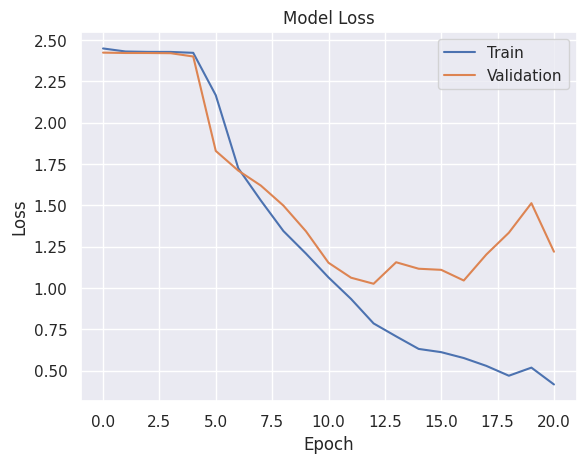

None

In [ ]:
display(plot(history, 'loss'))

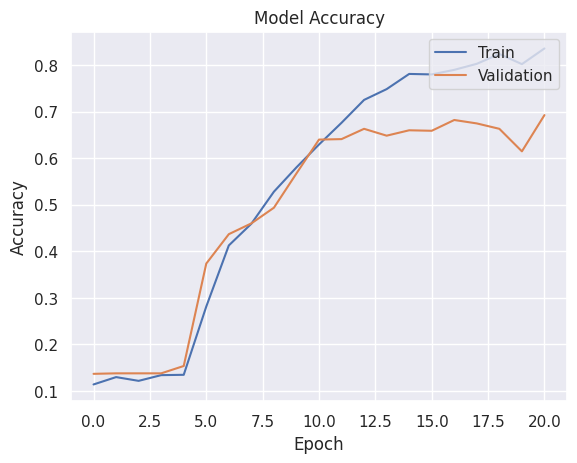

None

In [ ]:
display(plot(history, 'accuracy'))

**Observations:**
- after 5th epoch, the loss and accuracy strarts diverging between Train and Validation sets.  

- after 9th epoch, loss does not decrease, so early-stopping kicked in

### Now load back the model and use model.evaluate() to see results

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('best_model.model_1.keras')

# Evaluate the model on the validation data
loss1, accuracy1 = model1.evaluate(X_val_normalized, y_val_encoded)
print(f"Loaded model accuracy: {accuracy1:.2f}, loss: {loss1:.2f}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6590 - loss: 1.0356
Loaded model accuracy: 0.66, loss: 1.03


## Create a confusion matrix shown in heat map

### Explanation of code

- t**rue_classes_indices = y_test_encoded.argmax(axis=1)**: this effectively shows the indicies of the correct class from original y_test_encoded

- **predictions = model.predict(X_test_normalized)**: makes predictons on X_test_normalized
- **predicted_classes_indices = np.argmax(predictions, axis=1)**: similarly shows the indicies of the class from predictions on X_test_normalized
- **label_values = lb.classes_**: this shows the encoded labels used by labelBinarizer
- **fmt='.0f'** means round the number to the nearest integer

  - .    : Indicates that the formatting is for floating-point numbers.
  - 0    : Specifies that there should be zero digits after the decimal point, meaning the values are displayed as whole numbers (integers).
  - f    : Stands for "floating-point number".
  
  However, since we are using .0f, it effectively rounds the numbers to the nearest integer and displays them without any decimal places.

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


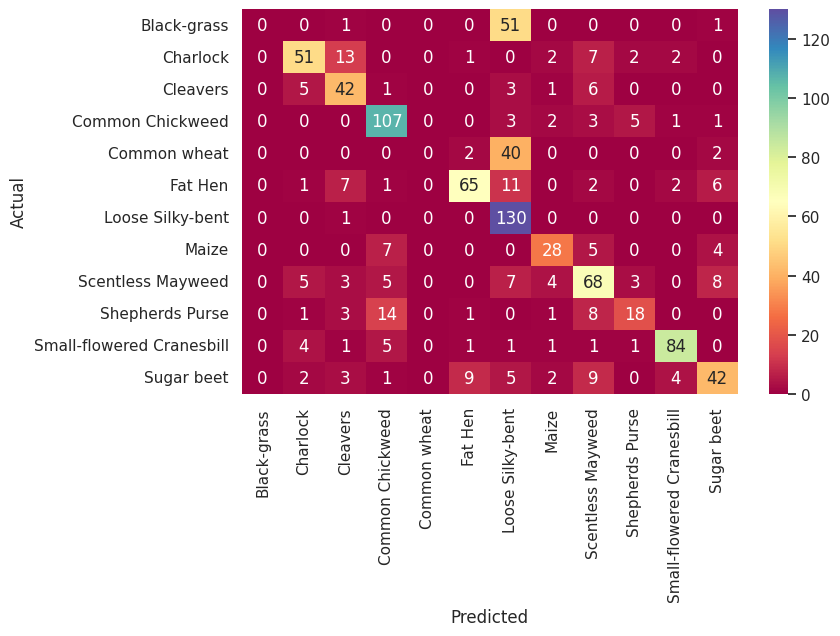

In [ ]:
# Confusion Matrix HeatMap
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the true class indices
true_classes_indices = y_test_encoded.argmax(axis=1)

# Get predictions from the model
predictions = model1.predict(X_test_normalized)

# Convert the predicted probabilities (logits) to class indices
predicted_classes_indices = np.argmax(predictions, axis=1)

# To get the label names for confusion matrix heatmap
label_values = lb.classes_

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(true_classes_indices, predicted_classes_indices)  # Compare indices directly
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=label_values, yticklabels=label_values, cmap='Spectral')  # fmt='.0f' means round the number to the nearest integer
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()




**Observations:**

- The Confusion Matrix Heat Map shows resluts that are not too good
- This is expected since the accuracy calculated was only 69%. So, there are lot of misclassifications
  - 51 Black-grass got classified as Loose Silky-bent
  - 40 Common wheat got classified as Loose Silky-bent
  - most of Common wheat got classified as Loose Silky-bent

 -  Small-flowered Cranesbill identification was really good at 84 correctly predicted with only 9 incorrectly predicted
 - Common chickweed got predicted really well

**This matches with our earlier Interpretation of t-SNE Plot**

  - **"Loose Silky-bent"**: are spread out across a large part of the plot, often overlapping with other categories. This overlap suggests that the features used to distinguish these categories might not be sufficiently discriminative, leading to similar embeddings for different categories.

- **Isolated Clusters:** Some points form distinct clusters (e.g., some of the blue points representing "**Small-flowered Cranesbill**" and **"Common Chickweed"**), indicating that t-SNE has identified distinct groupings in the data that correspond well with specific categories.

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

The **ReduceLROnPlateau** callback in Keras is useful for reducing the learning rate when a metric has stopped improving, which can help the model converge to a better solution. This callback is particularly helpful when the model's performance plateaus during training, as it allows the optimizer to take smaller steps in the parameter space

**Note: ** Patience parameter in ReduceLROnPlateau is kept lower than early stopping Patience parameter.  The reason for this is that we want the learning rate to decrease in case we can get better local minima and not stop learning due to early stopping terminating the process right away

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
K.clear_session()

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Initialize the Sequential model
model_2 = Sequential()

# Define input layer
model_2.add(Input(shape=(X_train_normalized.shape[1:])))  # (64,64,3)

# Add convolutional layers and max pooling layers
model_2.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_2.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding='same'))

model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding='same'))

model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding='same'))

# Flatten the output
model_2.add(Flatten())

# Add fully connected dense layers with dropout
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.25))

model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.25))

# Final output layer
model_2.add(Dense(units=12, activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.001)
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


# Display model summary
model_2.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,236 (1.36 MB)

 Trainable params: 356,236 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model with early stopping, checkpointing, and learning rate reduction on plateau

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import time

# Define training parameters
epochs = 100
batch_size = 32

# Set up early stopping and model checkpointing
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8, restore_best_weights=True)
mc = ModelCheckpoint('best_model.model_2.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Set up ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=0.00001, verbose=1)

# Record the start time
start = time.time()

# Train the model with early stopping, checkpointing, and learning rate reduction on plateau
history = model_2.fit(
    X_train_normalized,
    y_train_encoded,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_normalized, y_val_encoded),
    callbacks=[es, mc, reduce_lr]  # Include all three callbacks here
)

# Calculate and print the training time
end = time.time()
timedur = end - start
print(f"Training time: {timedur:.2f} seconds")


Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1217 - loss: 2.4664
Epoch 1: val_loss improved from inf to 2.41886, saving model to best_model.model_2.keras
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.1217 - loss: 2.4662 - val_accuracy: 0.1379 - val_loss: 2.4189 - learning_rate: 0.0010
Epoch 2/100
87/90 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1843 - loss: 2.3718
Epoch 2: val_loss improved from 2.41886 to 1.88819, saving model to best_model.model_2.keras
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1864 - loss: 2.3673 - val_accuracy: 0.3663 - val_loss: 1.8882 - learning_rate: 0.0010
Epoch 3/100
88/90 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3673 - loss: 1.8696
Epoch 3: val_loss improved from 1.88819 to 1.88288, saving model to best_model.model_2.keras
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3676 - loss: 1.8681 - val_accuracy: 0.3842 - val_loss: 1.8829 - learning_rate: 0.0010
Epoch 4/100
88/90 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/

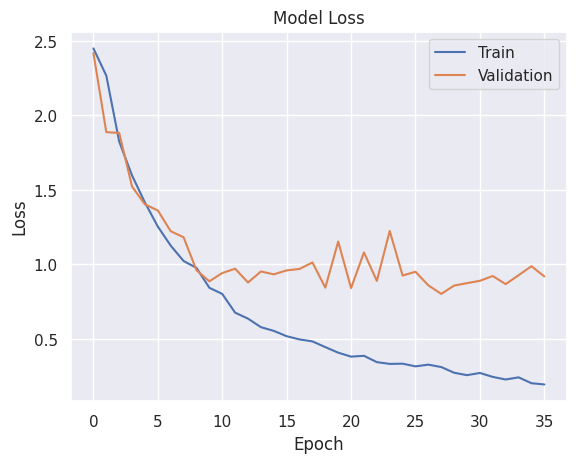

None

In [ ]:
display(plot(history, 'loss'))

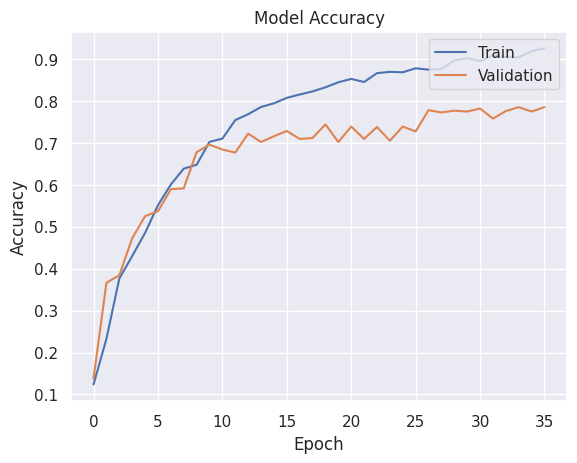

None

In [ ]:
display(plot(history, 'accuracy'))

### Now load back the model and use model.evaluate() to see results

In [ ]:
from tensorflow.keras.models import load_model
model2 = load_model('best_model.model_2.keras')

# Evaluate the model on the validation data
loss2, accuracy2 = model2.evaluate(X_val_normalized, y_val_encoded)
#print(f"Raw accuracy: {accuracy}, Raw loss: {loss}")
print(f"Loaded model accuracy: {accuracy2:.2f}, loss: {loss2:.2f}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7731 - loss: 0.7644
Loaded model accuracy: 0.77, loss: 0.80


**Observations:**
- Accuracy now jumped to 77% (from 66% in model_1)

## Create a confusion matrix shown in heat map

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


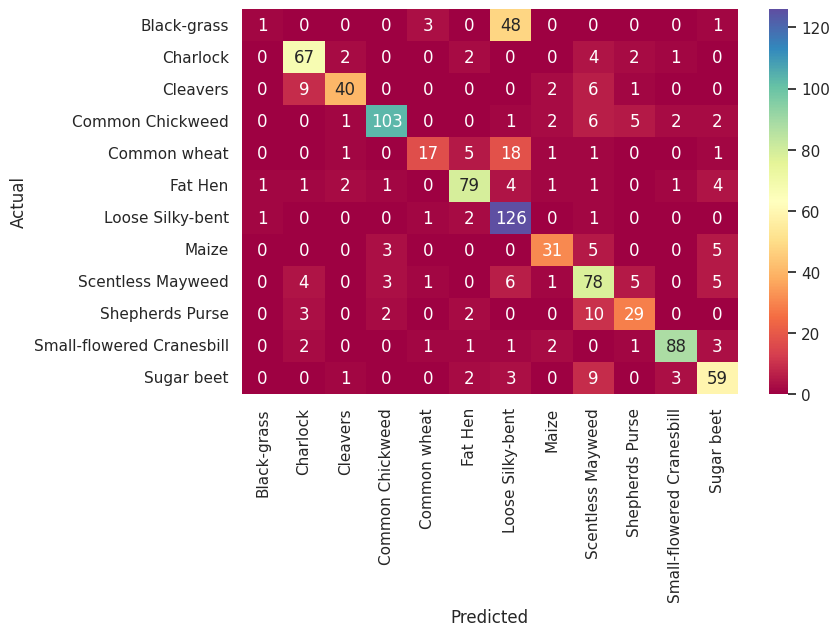

In [ ]:
# Confusion Matrix HeatMap
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the true class indices
true_classes_indices = y_test_encoded.argmax(axis=1)

# Get predictions from the model
predictions = model2.predict(X_test_normalized)

# Convert the predicted probabilities (logits) to class indices
predicted_classes_indices = np.argmax(predictions, axis=1)

# To get the label names for confusion matrix heatmap
label_values = lb.classes_

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(true_classes_indices, predicted_classes_indices)  # Compare indices directly
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=label_values, yticklabels=label_values, cmap='Spectral')  # fmt='.0f' means round the number to the nearest integer
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations:**

- The Confusion Matrix Heat Map shows resluts that are not too good
- This is expected since the accuracy calculated was only 73% (improvement from model_1 which was 69%). So, there are still lot of misclassifications
  - 51 Black-grass got classified as Loose Silky-bent
  - 37 Common wheat got classified as Loose Silky-bent
  - most of Common wheat got classified as Loose Silky-bent, though 1 was identified

-  Small-flowered Cranesbill identification was really good at 84 correctly predicted with only 15 incorrectly predicted
- Common chickweed got predicted really well

**This matches with our earlier Interpretation of t-SNE Plot**

  - **"Loose Silky-bent"**: are spread out across a large part of the plot, often overlapping with other categories. This overlap suggests that the features used to distinguish these categories might not be sufficiently discriminative, leading to similar embeddings for different categories.

- **Isolated Clusters:** Some points form distinct clusters (e.g., some of the blue points representing "**Small-flowered Cranesbill**" and **"Common Chickweed"**), indicating that t-SNE has identified distinct groupings in the data that correspond well with specific categories.

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

Data augmentation generates additional training images by applying random transformations, which helps the model generalize better to unseen data.

- **ImageDataGenerator** creates multiple variations of each image in the training set, helping the model learn more robust features.
- **steps_per_epoch** is set based on the size of your training data, ensuring that the model sees each image in the training set during each epoch.

**The steps_per_epoch parameter** in the fit method specifies the total number of batches of data that will be propagated through the model for one epoch. Essentially, it determines how many iterations the model needs to complete one epoch.

**Calculation of steps_per_epoch:**

- **Without Data Augmentation:** When training without data augmentation, the dataset is typically loaded entirely into memory, and the model iterates through the entire dataset once per epoch. Here, steps_per_epoch is not necessary to specify explicitly because the fit method can automatically determine how many steps are needed based on the number of samples and batch size.

    - **Example:** If your training set has 2,850 samples and you use a batch size of 32, then steps_per_epoch would be 2850 // 32 = 89.

- **With Data Augmentation:** When using data augmentation, the ImageDataGenerator **generates batches of augmented images on-the-fly**, meaning the entire dataset isn't loaded into memory at once. In this case, you need to manually specify steps_per_epoch to control how many batches will be generated and used in each epoch.

    - **Example:** If steps_per_epoch is set to 89 and batch_size is 32, the model will see 89 batches (each containing 32 augmented images) per epoch, making a total of 89 * 32 = 2,848 images per epoch.

**With data augmentation, steps_per_epoch is critical because it dictates how many batches of augmented data the model will process per epoch, ensuring that the training is properly paced and managed.**  

**How Data Augmentation works:**

- **Original Data as the Base:** The generator starts with your original dataset (X_train_normalized and y_train_encoded).
- **On-the-Fly Augmentation:** For each batch during training, the generator applies random transformations (such as rotations, shifts, flips, etc.) to the original images, creating new, augmented images. These transformations are applied in real-time, meaning that the model never sees the exact same image twice during training, even though they are derived from the original images.

**Training on Both:** The model trains on these augmented images. Since the augmentation is done in real-time, each epoch uses a new set of augmented images based on the original data. **Essentially, the model is exposed to a combination of the original and newly created augmented images, though each augmented image is a modified version of an original one.**

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
K.clear_session()

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Initialize the Sequential model
model_3 = Sequential()

# Define input layer
model_3.add(Input(shape=(X_train_normalized.shape[1:])))  # (64,64,3)

# Add convolutional layers and max pooling layers
model_3.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_3.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_3.add(MaxPooling2D((2, 2), padding='same'))

model_3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_3.add(MaxPooling2D((2, 2), padding='same'))

model_3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_3.add(MaxPooling2D((2, 2), padding='same'))

# Flatten the output
model_3.add(Flatten())

# Add fully connected dense layers with dropout
model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.25))

model_3.add(Dense(64, activation='relu'))
model_3.add(Dropout(0.25))

# Final output layer
model_3.add(Dense(units=12, activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.001)
model_3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


# Display model summary
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,236 (1.36 MB)

 Trainable params: 356,236 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

### Setup data augmentation, EarlyStopping, ModelCheckpoint, ReduceLRonPlateau

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

# Define training parameters
epochs = 100
batch_size = 32

# Set up early stopping and model checkpointing
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8, restore_best_weights=True)
mc = ModelCheckpoint('best_model.model_3.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Set up ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=0.00001, verbose=1)



# define augmentatio Techniques
datagen = ImageDataGenerator(
    rotation_range=20,           # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,       # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,      # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,             # Apply random shear transformations
    zoom_range=0.2,              # Randomly zoom into images by up to 20%
    horizontal_flip=True,        # Randomly flip images horizontally
    fill_mode='nearest'          # Fill in missing pixels after transformations
)

# Apply Data Augmentation to the Training Set
train_generator = datagen.flow(
    X_train_normalized,
    y_train_encoded,
    batch_size=batch_size
)



**Train The Model**

In [ ]:
# Record the start time
start = time.time()

# Train the model with early stopping, checkpointing, and learning rate reduction on plateau
history = model_3.fit(
    train_generator,  # Use the augmented data generator
    # X_train_normalized,
    # y_train_encoded,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_normalized, y_val_encoded),
    callbacks=[es, mc, reduce_lr],  # Include all three callbacks here
    steps_per_epoch=len(X_train_normalized) // batch_size  # Calculate the number of steps per epoch
)

# Calculate and print the training time
end = time.time()
timedur = end - start
print(f"Training time: {timedur:.2f} seconds")

Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.1136 - loss: 2.4559
Epoch 1: val_loss improved from inf to 2.41800, saving model to best_model.model_3.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.1137 - loss: 2.4558 - val_accuracy: 0.1379 - val_loss: 2.4180 - learning_rate: 0.0010
Epoch 2/100
 1/89 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0938 - loss: 2.3520
Epoch 2: val_loss improved from 2.41800 to 2.41782, saving model to best_model.model_3.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0938 - loss: 2.3520 - val_accuracy: 0.1379 - val_loss: 2.4178 - learning_rate: 0.0010
Epoch 3/100
86/89 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.1241 - loss: 2.4314
Epoch 3: val_loss did not improve from 2.41782
89/89 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.1242 - loss: 2.4315 - val_accuracy: 0.1284 - val_loss: 2.4215 - learning_rate: 0.0010
Epoch 4/100
 1/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0938 - loss: 2.3790
Epoch 

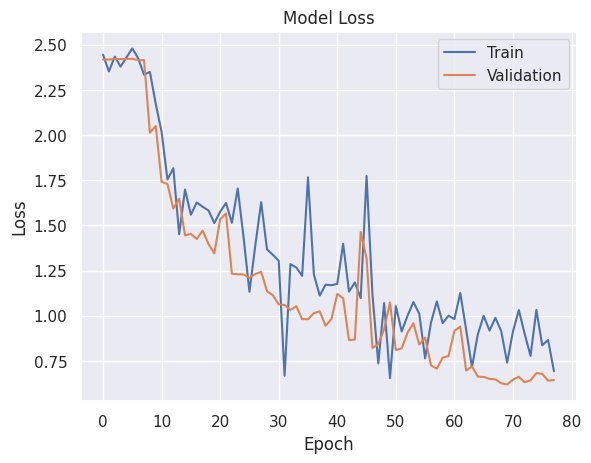

None

In [ ]:
display(plot(history, 'loss'))

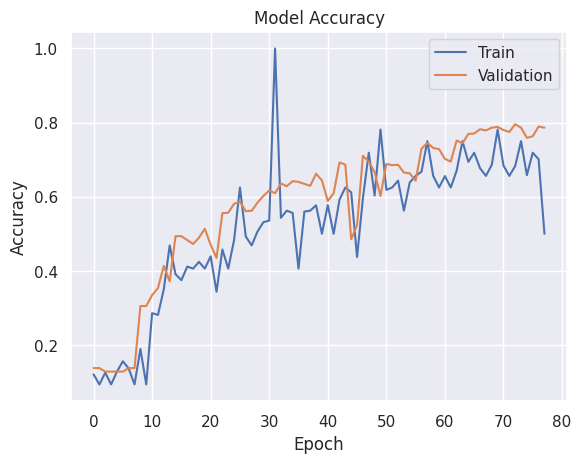

None

In [ ]:
display(plot(history, 'accuracy'))

### Now let's load the new model and evualate results

In [ ]:
from tensorflow.keras.models import load_model
model3 = load_model('best_model.model_3.keras')

# Evaluate the model on the validation data
loss3, accuracy3 = model3.evaluate(X_val_normalized, y_val_encoded)
print(f"Loaded model accuracy: {accuracy3:.2f}, loss: {loss3:.2f}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7929 - loss: 0.6084
Loaded model accuracy: 0.79, loss: 0.62


**Observations:**
- Data Augmentation has slightly improved model performance by 2%

### show confusion matrix

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


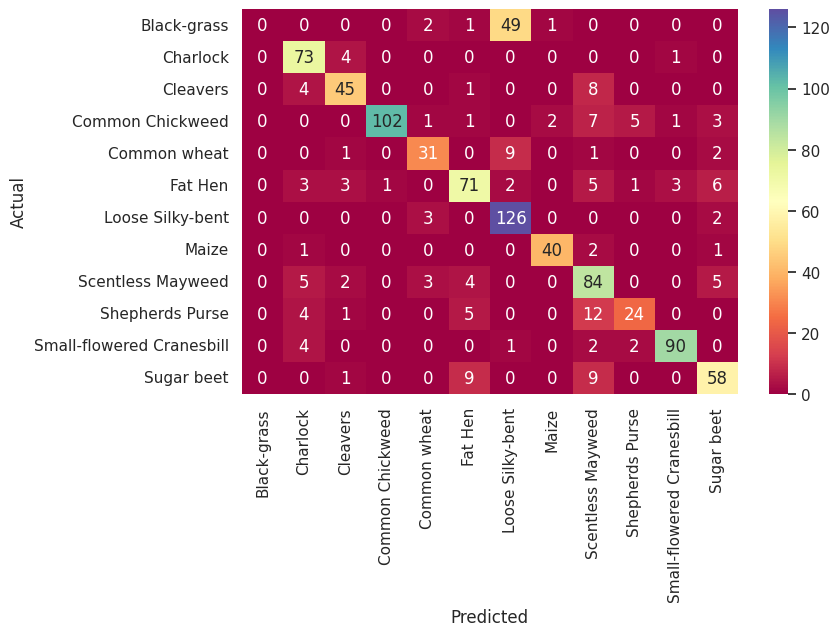

In [ ]:
# Confusion Matrix HeatMap
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the true class indices
true_classes_indices = y_test_encoded.argmax(axis=1)

# Get predictions from the model
predictions = model3.predict(X_test_normalized)

# Convert the predicted probabilities (logits) to class indices
predicted_classes_indices = np.argmax(predictions, axis=1)

# To get the label names for confusion matrix heatmap
label_values = lb.classes_

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(true_classes_indices, predicted_classes_indices)  # Compare indices directly
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=label_values, yticklabels=label_values, cmap='Spectral')  # fmt='.0f' means round the number to the nearest integer
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Trying model4 with **Aggressive data augmentation** for minority class

- aggressive for minority classes
- less aggressive for majority classes




In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
K.clear_session()

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Initialize the Sequential model
model_4 = Sequential()

# Define input layer
model_4.add(Input(shape=(X_train_normalized.shape[1:])))  # (64,64,3)

# Add convolutional layers and max pooling layers
model_4.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_4.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_4.add(MaxPooling2D((2, 2), padding='same'))

model_4.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_4.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_4.add(MaxPooling2D((2, 2), padding='same'))

model_4.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_4.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_4.add(MaxPooling2D((2, 2), padding='same'))

# Flatten the output
model_4.add(Flatten())

# Add fully connected dense layers with dropout
model_4.add(Dense(128, activation='relu'))
model_4.add(Dropout(0.25))

model_4.add(Dense(64, activation='relu'))
model_4.add(Dropout(0.25))

# Final output layer
model_4.add(Dense(units=12, activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.001)
model_4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


# Display model summary
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,236 (1.36 MB)

 Trainable params: 356,236 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

### Applying datagen to minority class only

- First let's identify the minority class manually

In [ ]:
y_train_encoded_df = pd.DataFrame(y_train_encoded)
y_train_encoded_df.head()



0   1   2   3   4   5   6   7   8   9   10  11
0   0   1   0   0   0   0   0   0   0   0   0   0
1   0   0   0   0   0   0   1   0   0   0   0   0
2   0   0   0   0   0   0   0   1   0   0   0   0
3   0   0   0   0   0   0   0   0   0   0   1   0
4   0   0   0   1   0   0   0   0   0   0   0   0

In [ ]:
# Checking class balance for train set

y_data_list = ['y_train_encoded_df']

# Loop to check class balance
for data_name in y_data_list:
    data_set = eval(data_name)
    print(f"Target value ratio in {data_name}:")
    print(f"{data_set.value_counts(normalize=True)} \n{'-'*80}")

Target value ratio in y_train_encoded_df:
0  1  2  3  4  5  6  7  8  9  10  11
0  0  0  0  0  0  1  0  0  0  0   0     0.137544
         1  0  0  0  0  0  0  0   0     0.128772
         0  0  0  0  0  1  0  0   0     0.108772
                        0  0  1   0     0.104211
               1  0  0  0  0  0   0     0.100000
   1  0  0  0  0  0  0  0  0  0   0     0.082105
   0  0  0  0  0  0  0  0  0  0   1     0.081053
      1  0  0  0  0  0  0  0  0   0     0.060351
1  0  0  0  0  0  0  0  0  0  0   0     0.055088
0  0  0  0  0  0  0  0  0  1  0   0     0.048772
                     1  0  0  0   0     0.046667
            1  0  0  0  0  0  0   0     0.046667
Name: proportion, dtype: float64 
--------------------------------------------------------------------------------


In [ ]:
# To get the label names for confusion matrix heatmap
label_values = lb.classes_
for i, label in enumerate(label_values):
    print(f"{i}: {label}")


0: Black-grass
1: Charlock
2: Cleavers
3: Common Chickweed
4: Common wheat
5: Fat Hen
6: Loose Silky-bent
7: Maize
8: Scentless Mayweed
9: Shepherds Purse
10: Small-flowered Cranesbill
11: Sugar beet


Observations:
- class 0, 4, 7, 9 have the lowest values
  - 0: Black-grass:  0.055088
  - 4: Common wheat:  0.046667
  - 7: Maize: 0.046667
  - 9: Shepherds Purse: 0.048772

**Explanation of code below:**

**minority_indices = np.where(np.isin(np.argmax(y_train_encoded, axis=1), minority_class_indices))[0]**
- finds the indicies of the minority classes [0,4,7, 9]

```python
np.isin(np.argmax(y_train_encoded, axis=1), minority_class_indices)
```
Output:
```csv
array([False, False,  True, ..., False, False, False])
```
- **np.where()** will then convert the True values to the indicies

- **majority_indices = np.where(~np.isin(np.argmax(y_train_encoded, axis=1), minority_class_indices))[0]**
  - The expression `~np.isin(...) is using the bitwise NOT operator (~)` in combination with np.isin() to perform a negation of the result of np.isin().


**batch_size=batch_size // 2**
- Minority generator: Produces 16 images (32 // 2).
- Majority generator: Produces 16 images (32 // 2).

These two sets of images are combined to form a final batch of size 32, with 16 samples from the minority classes and 16 samples from the majority classes.

**Explanation of the image generators**
- from tensorflow.keras.preprocessing.image import ImageDataGenerator
  - package needed for Image Generator

```python
# Data augmentation for majority classes (less aggressive)
datagen_general = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Create a generator for the majority classes
majority_generator = datagen_general.flow(
    X_majority,
    y_majority,
    batch_size=batch_size // 2
)
```  

**X_majority and y_majority:**
- X_majority: This is the subset of your training images that belong to the majority classes.
- y_majority: These are the corresponding one-hot encoded labels for the majority class images.
- batch_size=batch_size // 2:

This parameter defines how many samples are included in each batch. In this case, the generator will produce batches of size batch_size // 2.
For example, if batch_size is 32, then batch_size // 2 equals 16, meaning each batch generated by the majority generator will have 16 images.

**flow() Method:**

- The .flow() method is part of the ImageDataGenerator class. It generates batches of augmented image data and corresponding labels from the dataset (X_majority, y_majority) in real-time during training.

- Purpose: Instead of loading all the images into memory at once, it loads and augments the images in small batches. This helps save memory and makes it possible to apply real-time data augmentation during model training.

**What it returns:** It returns a generator that produces batches of augmented images and labels. This generator can then be used as input to your model’s .fit() method for training.


**Explanation of the combined_generator function:**

```python
def combined_generator(minority_gen, majority_gen):
    while True:
        X_minority_batch, y_minority_batch = next(minority_gen)
        X_majority_batch, y_majority_batch = next(majority_gen)
        
        # Concatenate both batches
        X_batch = np.concatenate([X_minority_batch, X_majority_batch])
        y_batch = np.concatenate([y_minority_batch, y_majority_batch])
        
        yield X_batch, y_batch
```        

The combined_generator function is designed to combine two data generators—one for the minority class samples and one for the majority class samples—into a single generator that yields batches with a mix of both.
- The while True loop makes the generator function continuous. It will keep yielding batches of data until the training process stops. This is necessary because data generators need to continuously supply batches of data during the training of a neural network.

- **next(minority_gen):** This line fetches the next batch of samples (X_minority_batch) and their corresponding labels (y_minority_batch) from the minority class generator.
- **next(majority_gen):** Similarly, this line fetches the next batch of samples (X_majority_batch) and their labels (y_majority_batch) from the majority class generator.

Each generator is responsible for providing a batch of images (features) and labels from either the minority or majority classes.

- **np.concatenate([X_minority_batch, X_majority_batch]):**

 This concatenates the feature batches from both generators (minority and majority) along the first axis (i.e., it stacks the batches together to form one larger batch).

- **np.concatenate([y_minority_batch, y_majority_batch]):**

Similarly, this concatenates the label batches from both the minority and majority generators.

The result is that each batch will have a mix of minority and majority class samples, making the overall batch size larger and more balanced in terms of class representation.

- **yield:**

This is how Python generators work. Instead of returning the result and stopping, yield produces the result (i.e., the combined batch of data and labels) and keeps the function state alive so it can be called again. This allows the training loop to receive batches continuously.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

# Define training parameters
epochs = 100
batch_size = 32

# Set up early stopping and model checkpointing
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8, restore_best_weights=True)
mc = ModelCheckpoint('best_model.model_4.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Set up ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=0.00001, verbose=1)

# Set the indices of the minority classes
minority_class_indices = [0, 4, 7, 9]  # Set the indicies of your minority class

# Get the indices of samples that belong to these minority classes
minority_indices = np.where(np.isin(np.argmax(y_train_encoded, axis=1), minority_class_indices))[0]

# Extract the minority class images and labels
X_minority = X_train_normalized[minority_indices]
y_minority = y_train_encoded[minority_indices]


# Data augmentation for minority classes (more aggressive)
datagen_minority = ImageDataGenerator(
    rotation_range=40,
    zoom_range=0.3,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a generator for the minority classes
minority_generator = datagen_minority.flow(
    X_minority,
    y_minority,
    batch_size=batch_size // 2  # Use smaller batch size to balance with majority class.
                                # Note: this will not reassingn the variable batch_size to 16
)

# Get the majority class indices
majority_indices = np.where(~np.isin(np.argmax(y_train_encoded, axis=1), minority_class_indices))[0]

# Extract majority class images and labels
X_majority = X_train_normalized[majority_indices]
y_majority = y_train_encoded[majority_indices]

# Data augmentation for majority classes (less aggressive)
datagen_general = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Create a generator for the majority classes
majority_generator = datagen_general.flow(
    X_majority,
    y_majority,
    batch_size=batch_size // 2
)

# Combine the two generators into one that yields batches from both minority and majority
def combined_generator(minority_gen, majority_gen):
    while True:
        X_minority_batch, y_minority_batch = next(minority_gen)
        X_majority_batch, y_majority_batch = next(majority_gen)

        # Concatenate both batches
        X_batch = np.concatenate([X_minority_batch, X_majority_batch])
        y_batch = np.concatenate([y_minority_batch, y_majority_batch])

        yield X_batch, y_batch

# Create the combined generator
train_generator = combined_generator(minority_generator, majority_generator)

In [ ]:
# Record the start time
start = time.time()

# Train the model
history = model_4.fit(
    train_generator,
    epochs=epochs,
    validation_data=(X_val_normalized, y_val_encoded),
    callbacks=[es, mc, reduce_lr],
    steps_per_epoch=(len(X_train_normalized) // batch_size)  # Ensure correct steps per epoch
)

# Calculate and print the training time
end = time.time()
timedur = end - start
print(f"Training time: {timedur:.2f} seconds")


Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.1224 - loss: 2.4472
Epoch 1: val_loss improved from inf to 2.60732, saving model to best_model.model_4.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.1225 - loss: 2.4470 - val_accuracy: 0.0579 - val_loss: 2.6073 - learning_rate: 0.0010
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1671 - loss: 2.3540
Epoch 2: val_loss improved from 2.60732 to 2.15619, saving model to best_model.model_4.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.1674 - loss: 2.3527 - val_accuracy: 0.0968 - val_loss: 2.1562 - learning_rate: 0.0010
Epoch 3/100
88/89 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2336 - loss: 1.9563
Epoch 3: val_loss improved from 2.15619 to 2.05422, saving model to best_model.model_4.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.2339 - loss: 1.9554 - val_accuracy: 0.1505 - val_loss: 2.0542 - learning_rate: 0.0010
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 42

### Show Loss and accuracy plots

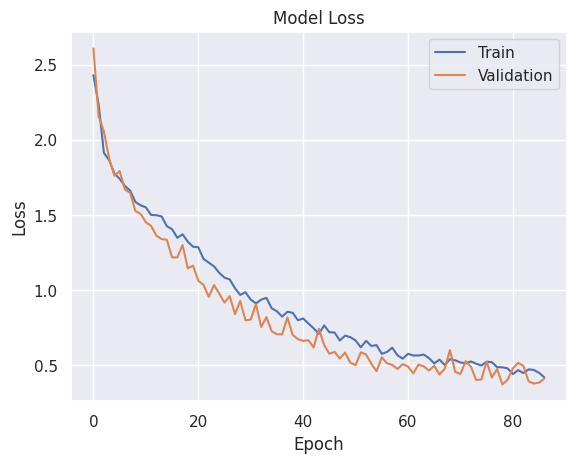

None

In [ ]:
display(plot(history, 'loss'))

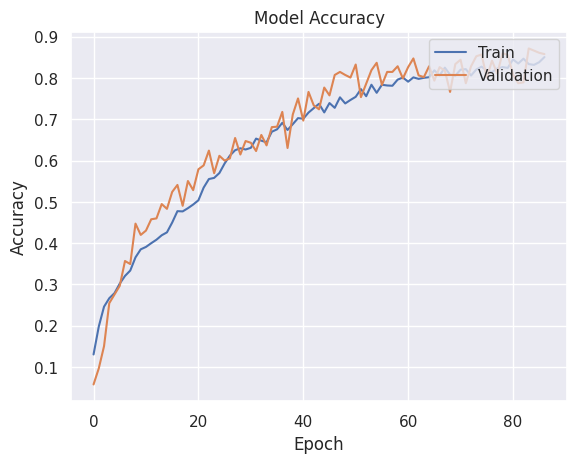

None

In [ ]:
display(plot(history, 'accuracy'))

### Load the model and evaluate

In [ ]:
from tensorflow.keras.models import load_model
model4 = load_model('best_model.model_4.keras')

# Evaluate the model on the validation data
loss4, accuracy4 = model4.evaluate(X_val_normalized, y_val_encoded)
print(f"Loaded model accuracy: {accuracy4:.2f}, loss: {loss4:.2f}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8648 - loss: 0.3654
Loaded model accuracy: 0.86, loss: 0.37


### create confusion matrix

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


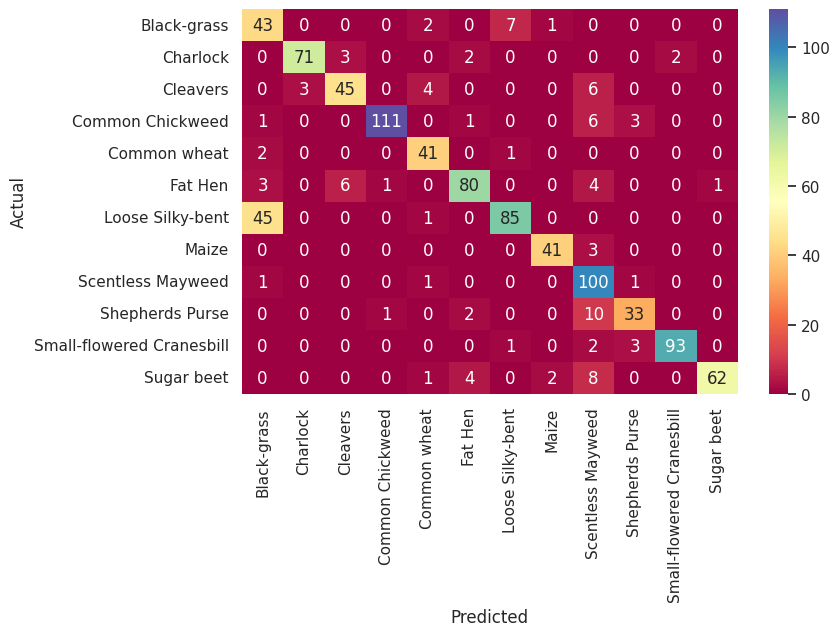

In [ ]:
# Confusion Matrix HeatMap
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the true class indices
true_classes_indices = y_test_encoded.argmax(axis=1)

# Get predictions from the model
predictions = model4.predict(X_test_normalized)

# Convert the predicted probabilities (logits) to class indices
predicted_classes_indices = np.argmax(predictions, axis=1)

# To get the label names for confusion matrix heatmap
label_values = lb.classes_

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(true_classes_indices, predicted_classes_indices)  # Compare indices directly
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=label_values, yticklabels=label_values, cmap='Spectral')  # fmt='.0f' means round the number to the nearest integer
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations:**
- This model has significantly improved. Loaded model accuracy: 0.86, loss: 0.37
- Confusion Matrix shows that some Black Grass and Loose Silky-bent having issues being distinguished

## Lets try to build a model using a pre-trained model vgg16 and see what we get - **Transfer Learning**

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
K.clear_session()

### load VGG16 model which is trained on imagenet

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

# Summary of the whole model
model = VGG16(weights='imagenet')
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

- **include_top=False:** Loads only the convolutional base of the model (without the fully connected layers), so you can add your own layers for your specific task (like classification or regression for a different dataset).

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, Input

# Load the VGG16 model without the top fully connected layers, and freeze the layers
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Observations:
- Notice that block5_pool is now the last layer
- Total Params decreased significantly

## Freeze the top layers
- The pre-trained layers of VGG16 (or any other model) have already learned to extract powerful and generalizable features from images, such as edges, textures, and shapes. By freezing these layers, you retain this valuable feature extraction capability without modifying or losing the knowledge that the model has learned from large datasets like ImageNet.

In [ ]:
# Freeze the layers of VGG16
for layer in vgg_model.layers:
    layer.trainable = False

# Verify the frozen layers
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_layer_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


## We'll only use till `block4-conv1` layer for our training:
- **Shallow layers (earlier blocks)**, like block4_conv1, extract more general, low- to mid-level features such as edges, textures, and simple patterns. These features tend to generalize well across different types of images.
- **Deeper layers (later blocks)**, like those in block5, extract more complex, high-level features that are often more specific to the task the model was originally trained on (in this case, ImageNet classification). These features may not transfer as well to new datasets if the new task is significantly different from ImageNet.

In [ ]:
# Create a new model that only includes layers up to 'block3_pool'
vgg_model_block4 = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer('block4_conv1').output)
vgg_model_block4.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,915,648 (11.12 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,915,648 (11.12 MB)

## Create the model

In [ ]:
## append to the model, compile and show model.summary()

## ******* Define Input & Output Layer
# Define the input for the new model
input_layer = Input(shape=(64, 64, 3)) # our images are 64X64X3

# Use the VGG model for feature extraction
# vgg_output = vgg_model(input_layer)
vgg_output = vgg_model_block4(input_layer)


##### Flatten the output of VGG16
flat_layer = Flatten()(vgg_output)

# Adding a dense input layer
dense_1 = Dense(128, activation='relu')(flat_layer)

# add batch normalization
batch_norm_1 = BatchNormalization()(dense_1)

# Dropout layer
dropout_1 = Dropout(0.5)(batch_norm_1)

# # Adding another dense input layer
# dense_2 = Dense(64, activation='relu')(dropout_1)



# Final output layer
#output_layer = Dense(units=12, activation='softmax')(dense_2)
output_layer = Dense(units=12, activation='softmax')(dropout_1)



# Create the model <--------------------------
model_5 = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
opt = Adam(learning_rate=0.001)
model_5.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Display the summary of the model
model_5.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ functional (Functional)              │ (None, 8, 8, 512)           │       2,915,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,112,140 (27.13 MB)

 Trainable params: 4,196,236 (16.01 MB)

 Non-trainable params: 2,915,904 (11.12 MB)

## Setup data augmentation and other basic model related items

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

# Define training parameters
epochs = 100
batch_size = 32

# Set up early stopping and model checkpointing
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8, restore_best_weights=True)
mc = ModelCheckpoint('best_model.model_5.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Set up ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=0.00001, verbose=1)

# Set the indices of the minority classes
minority_class_indices = [0, 4, 7, 9]  # Set the indicies of your minority class

# Get the indices of samples that belong to these minority classes
minority_indices = np.where(np.isin(np.argmax(y_train_encoded, axis=1), minority_class_indices))[0]

# Extract the minority class images and labels
X_minority = X_train_normalized[minority_indices]
y_minority = y_train_encoded[minority_indices]


# Data augmentation for minority classes (more aggressive)
datagen_minority = ImageDataGenerator(
    rotation_range=40,
    zoom_range=0.3,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a generator for the minority classes
minority_generator = datagen_minority.flow(
    X_minority,
    y_minority,
    batch_size=batch_size // 2  # Use smaller batch size to balance with majority class.
                                # Note: this will not reassingn the variable batch_size to 16
)

# Get the majority class indices
majority_indices = np.where(~np.isin(np.argmax(y_train_encoded, axis=1), minority_class_indices))[0]

# Extract majority class images and labels
X_majority = X_train_normalized[majority_indices]
y_majority = y_train_encoded[majority_indices]

# Data augmentation for majority classes (less aggressive)
datagen_general = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Create a generator for the majority classes
majority_generator = datagen_general.flow(
    X_majority,
    y_majority,
    batch_size=batch_size // 2
)

# Combine the two generators into one that yields batches from both minority and majority
def combined_generator(minority_gen, majority_gen):
    while True:
        X_minority_batch, y_minority_batch = next(minority_gen)
        X_majority_batch, y_majority_batch = next(majority_gen)

        # Concatenate both batches
        X_batch = np.concatenate([X_minority_batch, X_majority_batch])
        y_batch = np.concatenate([y_minority_batch, y_majority_batch])

        yield X_batch, y_batch

# Create the combined generator
train_generator = combined_generator(minority_generator, majority_generator)

## Now run the model

In [ ]:
# Record the start time
start = time.time()

# Train the model
history = model_5.fit(
    train_generator,
    epochs=epochs,
    validation_data=(X_val_normalized, y_val_encoded),
    callbacks=[es, mc, reduce_lr],
    steps_per_epoch=(len(X_train_normalized) // batch_size)  # Ensure correct steps per epoch
)

# Calculate and print the training time
end = time.time()
timedur = end - start
print(f"Training time: {timedur:.2f} seconds")

Epoch 1/100
88/89 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.2709 - loss: 2.3549
Epoch 1: val_loss improved from inf to 2.66624, saving model to best_model.model_5.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 115ms/step - accuracy: 0.2723 - loss: 2.3479 - val_accuracy: 0.3021 - val_loss: 2.6662 - learning_rate: 0.0010
Epoch 2/100
88/89 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4423 - loss: 1.6256
Epoch 2: val_loss improved from 2.66624 to 1.67386, saving model to best_model.model_5.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.4426 - loss: 1.6244 - val_accuracy: 0.4579 - val_loss: 1.6739 - learning_rate: 0.0010
Epoch 3/100
88/89 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4798 - loss: 1.4930
Epoch 3: val_loss improved from 1.67386 to 1.31483, saving model to best_model.model_5.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.4798 - loss: 1.4925 - val_accuracy: 0.5347 - val_loss: 1.3148 - learning_rate: 0.0010
Epoch 4/100
88/89 ━━━━━━━━━━━━━━━━━━━━ 0s 35m

## Show loss and accuracy plots

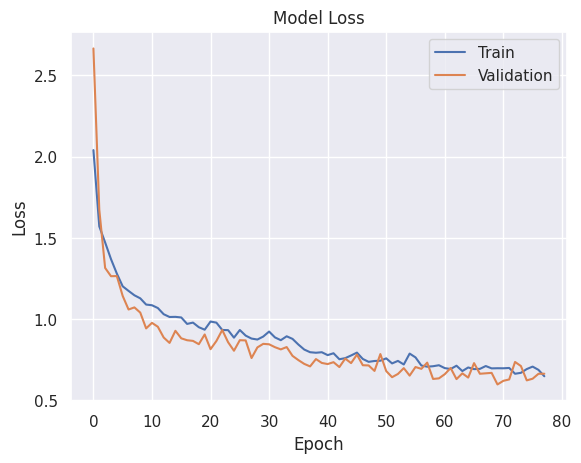

None

In [ ]:
display(plot(history, 'loss'))

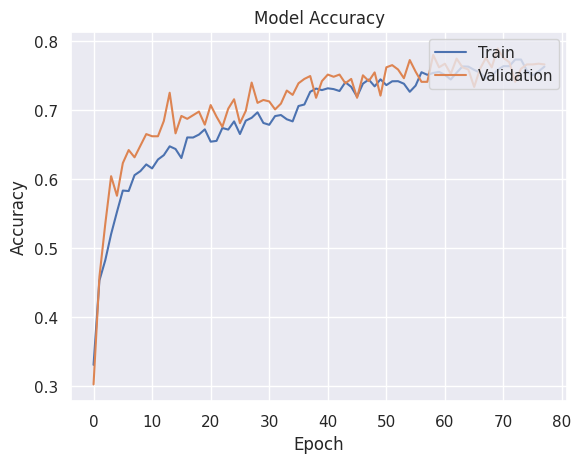

None

In [ ]:
display(plot(history, 'accuracy'))

## Load the model and evaluate

In [ ]:
from tensorflow.keras.models import load_model
model5 = load_model('best_model.model_5.keras')

# Evaluate the model on the validation data
loss5, accuracy5 = model5.evaluate(X_val_normalized, y_val_encoded)
print(f"Loaded model accuracy: {accuracy5:.2f}, loss: {loss5:.2f}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7838 - loss: 0.6032
Loaded model accuracy: 0.79, loss: 0.60


Observations:
- Transfer Learning made it easier for us and gave us pretty good results

## Create Confusion Matrix

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


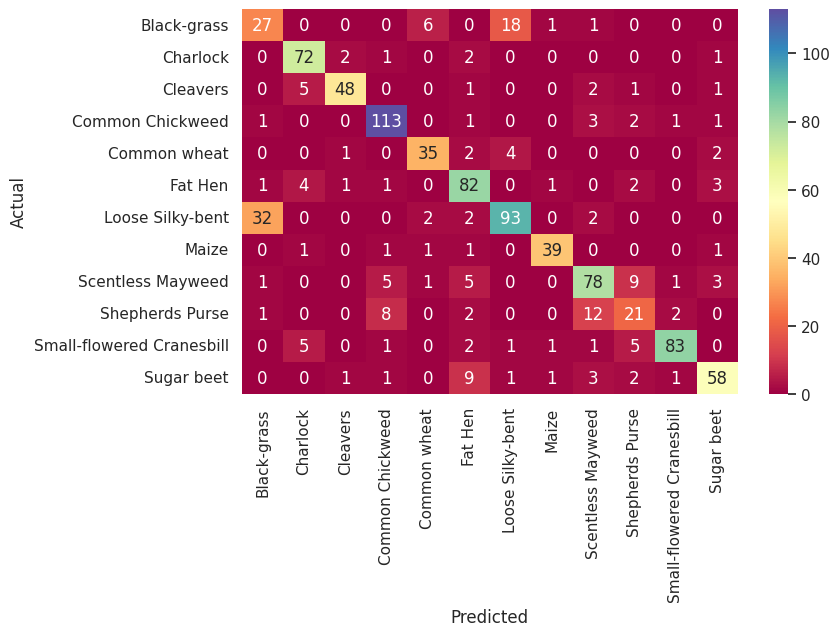

In [ ]:
# Confusion Matrix HeatMap
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the true class indices
true_classes_indices = y_test_encoded.argmax(axis=1)

# Get predictions from the model
predictions = model5.predict(X_test_normalized)

# Convert the predicted probabilities (logits) to class indices
predicted_classes_indices = np.argmax(predictions, axis=1)

# To get the label names for confusion matrix heatmap
label_values = lb.classes_

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(true_classes_indices, predicted_classes_indices)  # Compare indices directly
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=label_values, yticklabels=label_values, cmap='Spectral')  # fmt='.0f' means round the number to the nearest integer
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Final Model

## View a summary of the models

In [ ]:
import pandas as pd

# Create a dictionary to store the results
results = {
    'Model': ['Model1', 'Model2', 'Model3', 'Model4', 'Model5'],
    'Accuracy': [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5],
    'Loss': [loss1, loss2, loss3, loss4, loss5]
}

# Create a DataFrame
df = pd.DataFrame(results)

# Function to highlight the maximum accuracy
def highlight_selection(row):
    highlight = 'background-color: yellow'
    default = ''

    max_val_accuracy = df['Accuracy'].max()

    return [
        highlight if (col == 'Accuracy' and val == max_val_accuracy) else default
        for col, val in row.items()
    ]

# Apply the function to the DataFrame
df_style = df.style.apply(highlight_selection, axis=1)

# Display the styled DataFrame
df_style



**Observations:**

- Model4: Data Augmentation with more aggressive augmentation for minority class gave us best results

Comment on the final model you have selected and use the same in the below code to visualize the image.

The final model model_4 is a Convolutional Neural Network (CNN) that achieves 86% accuracy with a loss of 0.42 on the validation data. This is a solid performance for classifying plant seedlings into their respective categories. Below are the key aspects of the model and the reasoning behind its choices:

1. Model Architecture:

- The model is a deep CNN with multiple convolutional layers followed by max pooling, flattening, and fully connected dense layers. The architecture is well-suited for image classification tasks, as CNNs are known for their ability to automatically learn spatial hierarchies of features from images.
The use of Dropout layers helps in reducing overfitting by randomly turning off some neurons during training, making the model more generalizable.

- The final softmax layer ensures that the model outputs class probabilities, which is appropriate for multi-class classification tasks like this one.

2. Handling Class Imbalance:

- The most notable feature of this model is the custom data augmentation strategy for handling class imbalance. By using more aggressive augmentations for the minority classes and less aggressive augmentations for the majority classes, the model has effectively learned to classify underrepresented classes better.
- The approach of creating separate generators for minority and majority classes and combining them into balanced batches has significantly improved the model’s ability to generalize across all classes, preventing the model from being biased toward the majority classes.

3. Data Augmentation:

- Data augmentation plays a critical role in this model. The use of techniques like rotation, width/height shifts, zooms, and flips has enriched the training data by introducing variations that help the model generalize better to unseen data.
- The aggressive augmentation for minority classes ensures that the model gets sufficient exposure to these underrepresented classes, while moderate augmentation for the majority classes prevents overfitting to any specific transformations.
4. Regularization and Learning Rate Adjustment:

- The EarlyStopping callback with a patience of 8 prevents overfitting by stopping training when the model’s performance stops improving on the validation set.
- ReduceLROnPlateau helps in adjusting the learning rate dynamically, reducing it when the model hits a plateau, allowing for finer adjustments to the weights during training and improving convergence.
- The model checkpointing ensures that the best-performing model (based on validation loss) is saved, guaranteeing the optimal version is used in production.
5. Performance:

- With an accuracy of 86% and a loss of 0.42, the model shows strong potential for real-world application in classifying plant seedlings. This level of accuracy indicates that the model has effectively learned to distinguish between various plant species, even when they share similar visual features.
- Given the complexity of the task and the class imbalance challenge, this performance is commendable, and further improvements could push it closer to 90% with additional fine-tuning or data collection.

**Conclusion:**
This CNN model, with its balanced approach to data augmentation, class imbalance handling, and regularization, demonstrates a robust solution for the task of seedling classification. It strikes a good balance between complexity and performance, making it suitable for deployment in real-world agricultural applications. There is potential for further refinement, but this model serves as a solid foundation for automating plant seedling classification with AI, improving agricultural productivity and sustainability.


### Visualizing the prediction

- Choosing 1 random image from each category

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


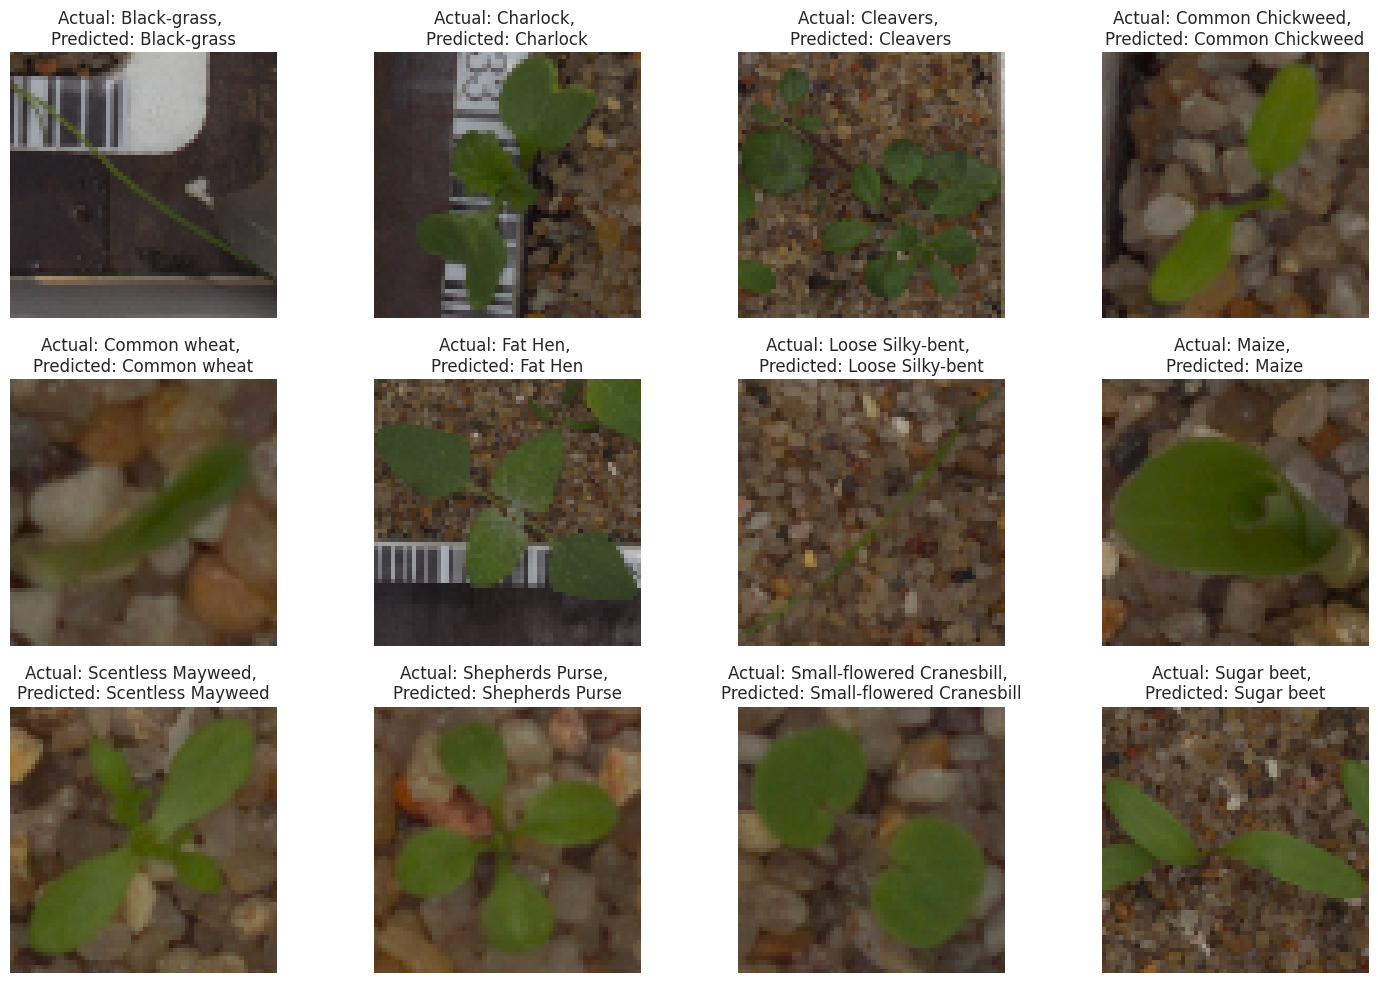

In [ ]:
# reset random seeds so, it gives different images each time
import random

random.seed(None)
np.random.seed(None)


# Make Predictions on test set and find the indexes pf the predictions
y_pred = model4.predict(X_test_normalized)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)


# Select random images from each category
num_classes = 12
random_indices = []

for i in range(num_classes):
    indices = np.where(y_test_labels == i)[0]  # Get all indices for class i
    random_index = np.random.choice(indices)  # Choose a random index from the above array
    random_indices.append(random_index)

#Get Label Values from labelBinarizer
label_values = lb.classes_

# Plot the Selected images with Predicted and Actual Labels
# Set up the plot
plt.figure(figsize=(15, 10))

for i, idx in enumerate(random_indices):
    plt.subplot(3, 4, i + 1)  # Adjust the grid based on the number of classes
    plt.imshow(X_test_normalized[idx])
    plt.title(f"Actual: {label_values[y_test_labels[idx]]}, \nPredicted: {label_values[y_pred_labels[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()



## Actionable Insights and Business Recommendations

**Actionable Insights:**
1. **Model Performance:**
- The final model achieves an accuracy of 86% with a loss of 0.37. This high accuracy indicates that the model is capable of reliably classifying plant seedlings into different categories. However, there is room for further improvement to push the accuracy closer to 90% or higher.
- The use of data augmentation for both minority and majority classes has successfully helped in improving the generalization of the model. The aggressive augmentation for minority classes has balanced the dataset, helping to mitigate class imbalance and reducing bias in the model.
2. **Class Imbalance Mitigation:**
- The application of different augmentation strategies for minority and majority classes has proven effective in addressing class imbalance, which is a common issue in classification tasks. By creating a custom data generator, the minority classes are better represented during training, leading to more balanced and accurate classification results.
3. **Time Efficiency:**
- The model training process took a reasonable amount of time and achieved high accuracy relatively quickly. This suggests that the system could be scaled to larger datasets or used in real-time applications for identifying plant species in a farming environment with further optimization.

4. **Potential for Real-time Classification:**
- Given the strong performance of the model, there is potential for real-time seedling classification in the field. The model's speed and accuracy can reduce the time required for farmers or agricultural workers to sort and categorize seedlings manually.

**Business Recommendations:**
1. **Integration into Agricultural Workflows:**
- Automated Seedling Classification: The trained CNN model can be integrated into a mobile or web-based application that allows farmers to upload images of seedlings for instant classification. This can significantly reduce the time required for manual sorting and identification.
2. **Real-time Monitoring:**
- Deploy the model on devices such as drones or robotic arms that can autonomously monitor and classify seedlings in the field, enabling real-time decision-making on plant health, categorization, and maintenance.

3. **Addressing Labor Shortages:**
- The model can help alleviate labor shortages in the agricultural sector by automating the repetitive and labor-intensive task of seedling identification and sorting. This would free up workers to focus on higher-order tasks, such as crop health analysis, yield optimization, and sustainable farming practices.
4. **Expansion into Other Use Cases:**
- **Crop Disease Detection:** With minor modifications and retraining on a dataset focused on plant diseases, the model could be adapted to detect early signs of plant diseases, thus preventing crop loss and improving yields.
- **Weed Detection and Management:** Similar technology can be applied to weed detection, helping farmers to manage and remove unwanted plants more efficiently, leading to better crop health and productivity.
4. **Sustainability and Precision Agriculture:**
- The use of AI in seedling classification will contribute to precision agriculture, where resources like water, fertilizers, and pesticides can be applied more accurately based on real-time analysis of plant growth. This approach will lead to reduced waste, lower environmental impact, and more sustainable farming practices.

5. **Commercial Viability:**
- The application of this technology has commercial potential in large-scale farming operations, nurseries, and greenhouses. Companies can license the technology or offer it as a service to farmers and agricultural companies looking to improve operational efficiency and reduce labor costs.
- **Customization for Specific Clients:** The model can be fine-tuned for specific regions or crops, offering tailored solutions for farmers dealing with specific plant species, climates, or agricultural challenges.
6. **Continuous Improvement:**
- **Data Collection:** Encourage farmers and agricultural professionals to provide feedback on the model’s performance in different environments, which will allow for continuous model refinement and improvement. Regular updates with more data will ensure the model stays robust and adaptable.
- **Long-term Learning:** Implement a feedback loop where new data from the field (e.g., misclassified seedlings) is collected and used to retrain the model periodically, ensuring continuous learning and adaptation to new types of plants or environmental conditions.

In summary, by leveraging AI to automate seedling classification, the agricultural industry can boost productivity, reduce costs, and work more sustainably. This will ultimately lead to improved crop yields and the creation of more efficient farming practices in both small-scale and large-scale operations.



*

# Converting to html format for submission

_____

In [ ]:
%%shell
#convert to html
jupyter nbconvert V1_SM-CV_Project_Full_Code_Notebook.ipynb --to html

[NbConvertApp] Converting notebook V1_SM-CV_Project_Full_Code_Notebook.ipynb to html
[NbConvertApp] Writing 7997088 bytes to V1_SM-CV_Project_Full_Code_Notebook.html
